In [1768]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot  as plt
from functools import reduce
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import plotly.express as px

In [1769]:
loan = pd.read_csv('D:/Python/dataSets/loan.csv')

loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [1770]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# <font color = blue> Analysis of Data</font>
## <font color = blue>Data cleaning </font>

In [1771]:
loan1=loan

## 	<font color = blue>1. Remove current loan status records and keep only fully paid and Charged-off loan status records </font>
	

In [1772]:
loan1 = loan1[~(loan1.loan_status=='Current')]
loan1.loan_status.unique()


array(['Fully Paid', 'Charged Off'], dtype=object)

In [1773]:
loan1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## <font color = blue>2.Drop not needed columns : reduce from 111 to 47</font>

In [1774]:
loan1.drop(columns=['delinq_2yrs','pymnt_plan','url'], inplace=True)
loan1.drop(columns=['revol_bal','initial_list_status','out_prncp','out_prncp_inv','total_pymnt_inv','last_pymnt_amnt','collections_12_mths_ex_med'], inplace=True)
loan1.drop(columns=['mths_since_last_major_derog','policy_code','application_type','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'], inplace=True)
loan1.drop(columns=['revol_util'], inplace=True)
loan1.drop(columns=['next_pymnt_d'], inplace=True)
loan1.drop(columns=['last_credit_pull_d'], inplace=True)
loan1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'pub_rec_bankruptcies'],
      dtype='object')

## <font color = blue>3. Drop duplicate columns</font>

In [1775]:
loan1.funded_amnt_inv.head() 
loan1.drop(columns=['funded_amnt', 'funded_amnt_inv' ], inplace=True)


## <font color = blue>4. Check for null values</font>

In [1776]:
loan1.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2386
emp_length                  1033
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12527
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     24905
mths_since_last_record     35837
open_acc                       0
pub_rec                        0
total_acc                      0
total_pymnt                    0
total_rec_prncp                0
total_rec_

### <font color = blue>4a. emp_title fill nulls with NA

In [1777]:
# emp_title
loan1["emp_title"] = loan1["emp_title"].fillna('NA')
loan1.emp_title.isnull().sum()

0

### <font color = blue>4b. emp_length : work experience of employee . <br> 1033 records are null, this is a small number, ie 2.8% .<br> Adding a mean of all the emp_length would be incorrect.<br>Hence dropping rows which have emp_length as null </font>

In [1778]:
# emp_length : work experience of employee
# 1033 records are null, this is a small number, ie 2.8%
# adding a mean of all the emp_length would be incorrect. 
# hence dropping rows which have emp_length as null
loan1.emp_length.unique()
loan1.emp_length.count()
1033/37544 *100

2.7514383123801407

In [1779]:
# dropping rows which have emp_length as null 
loan1=loan1[~loan1.emp_length.isnull()]
loan1.emp_length.isnull().sum()


0

### <font color= blue>4g. pub_rec_bankruptcies : replace nulls with 0</font>

### <font color = blue>4c. desc : fill null values with NA    </font>

In [1780]:
# desc : fill null values with NA                    
loan.desc.isnull().sum()
loan1["desc"] = loan1["desc"].fillna('NA')
loan1.desc.isnull().sum()


0

### <font color = blue>4d. mths_since_last_delinq :  replace null with 0 </font>

In [1781]:
# mths_since_last_delinq  :  replace null with 0
loan1.mths_since_last_delinq.head()
loan1["mths_since_last_delinq"] = loan1["mths_since_last_delinq"].fillna('0')
loan1.mths_since_last_delinq.isnull().sum()


0

### <font color=blue> 4f. mths_since_last_record : replace null with 0</font>

In [1782]:
# mths_since_last_record      : replace null with 0
loan1.mths_since_last_record.head()
loan1["mths_since_last_record"] = loan1["mths_since_last_record"].fillna('0')
loan1.mths_since_last_record.isnull().sum()

0

### <font color=blue>4g. pub_rec_bankruptcies : replace nulls with 0 (drop rate = 1.9 % )</font>

In [1783]:
#pub_rec_bankruptcies : replace nulls with 0
print(loan1.pub_rec_bankruptcies.isnull().sum())
print(len(loan1.pub_rec_bankruptcies))
loan1.pub_rec_bankruptcies.unique() #1.9 %
697/37544 *100

loan1["pub_rec_bankruptcies"] = loan1["pub_rec_bankruptcies"].fillna('0')
loan1.pub_rec_bankruptcies.isnull().sum()


697
37544


0

### <font color=blue>4h. title : replace nulls with 0</font>

In [1784]:
# title
loan1["title"] = loan1["title"].fillna('NA')
loan1.title.isnull().sum()


0

### <font color=blue>4i. last_pymnt_d : remove null records (drop rate = 0.002%) </font>

In [1785]:
# last_pymnt_d : remove null records
loan1.last_pymnt_d.isnull().sum()

loan1 = loan1[~loan1.last_pymnt_d.isnull()]

len(loan1.last_pymnt_d)
#37544
print("ration : " , 66/37544 )
loan1.last_pymnt_d.unique()
#loan1["last_pymnt_d"] = loan1["last_pymnt_d"].fillna('NA')
loan1.last_pymnt_d.isnull().sum()

ration :  0.0017579373535052205


0

### <font color='blue'> 4j.int_rate : remove %' </font>

In [1786]:
loan1.int_rate = loan1.int_rate.apply(lambda x : float(x.rstrip("%")))
loan1.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

### <font color='blue'> 4k.earliest_cr_line : split into month and year </font>

In [1787]:
loan1["earliest_cr_line_month"] = loan1.earliest_cr_line.apply(lambda x : x.split('-')[0])
loan1["earliest_cr_line_year"] = loan1.earliest_cr_line.apply(lambda x : x.split('-')[1])


loan1.earliest_cr_line_year=loan1.earliest_cr_line_year.astype("int32")
loan1.sort_values("earliest_cr_line_year" , ascending=False)

## 99 to 1999 and 03 to 2003
def adjustYear(yr) :
    print(yr)
    if(yr<40):
        yr1=[]
        yr1.append("200")
        yr1.append(str(yr))
        #print(yr1)
    else:
        yr1=[]
        yr1.append("19")
        yr1.append(str(yr))
       # print(yr1)    
    return(''.join([str(elem) for elem in yr1]))
    
   
loan2=loan1    
loan2.earliest_cr_line_year = loan1.earliest_cr_line_year.apply(lambda x : adjustYear(x))
loan2.earliest_cr_line_year.head()


85
99
1
96
4
5
7
4
4
98
89
4
3
91
7
98
93
3
1
97
83
85
3
1
2
3
84
6
87
81
5
7
5
0
4
7
3
94
98
4
95
99
95
6
92
2
92
99
4
6
0
98
98
4
0
7
2
6
2
6
97
5
95
2
0
4
0
94
5
5
94
84
99
0
3
89
3
6
96
0
0
2
83
96
3
2
0
7
98
96
1
2
86
98
5
97
5
4
90
2
4
95
94
92
6
2
97
6
0
90
3
0
99
0
5
1
88
99
4
91
0
4
4
95
5
5
98
0
7
91
0
0
6
2
5
93
97
6
4
90
0
4
95
1
2
1
6
99
98
5
5
4
1
83
95
94
6
98
86
93
80
4
4
8
96
4
99
4
2
2
90
6
99
1
91
2
98
89
94
98
96
2
3
6
99
5
86
1
2
98
3
6
98
94
7
3
4
4
2
90
4
93
0
5
0
91
5
1
99
90
96
0
2
98
79
2
96
6
5
0
81
2
97
0
1
1
99
3
2
93
3
0
5
6
97
94
6
97
5
81
91
98
98
94
6
6
96
91
99
98
93
98
3
1
95
3
2
99
96
1
98
1
1
98
92
4
0
87
6
98
1
3
2
99
2
2
98
6
96
97
91
95
0
96
5
6
0
4
2
0
1
3
1
1
0
0
81
0
97
0
0
3
95
88
3
0
3
1
3
98
2
7
90
2
91
93
3
1
92
3
2
95
0
98
0
4
0
89
96
2
90
6
94
1
96
84
0
95
6
0
2
99
5
98
7
98
8
0
98
94
5
5
5
86
5
99
4
7
99
5
98
93
2
90
94
2
92
99
4
94
0
99
1
95
91
0
3
99
88
2
7
94
96
1
98
2
83
7
2
95
7
1
1
0
97
0
0
4
93
2
98
97
2
78
1
99
91
95
2
0
1
92
96

7
0
1
1
96
88
0
1
96
91
89
0
0
86
1
94
7
2
99
89
93
91
95
6
1
98
99
4
94
97
2
96
74
96
93
97
2
85
97
91
87
90
92
91
99
2
7
3
2
72
6
5
1
0
0
88
6
0
99
0
96
1
86
93
96
96
0
95
5
7
89
7
92
96
82
91
3
98
95
96
1
3
1
86
92
0
85
4
93
5
82
94
99
6
90
99
97
93
91
93
99
0
3
1
94
93
95
4
92
90
5
0
3
98
6
94
6
98
0
93
4
63
0
89
85
8
94
98
6
2
0
1
1
96
99
95
90
2
1
3
95
97
90
77
91
85
99
99
99
93
93
0
96
96
95
99
96
96
3
3
85
88
87
97
96
96
0
6
2
95
5
88
90
3
99
2
1
7
94
95
92
95
1
97
0
4
98
2
3
95
87
0
3
90
85
2
93
88
96
95
91
89
97
98
93
92
94
4
91
94
88
99
1
0
99
6
94
97
96
2
3
93
88
1
91
98
94
89
0
99
91
97
82
95
1
4
99
85
7
97
95
99
89
1
78
87
97
85
7
81
1
92
0
5
69
5
99
94
3
97
89
91
1
4
94
96
1
90
5
1
99
99
90
99
95
92
7
80
99
1
4
83
72
87
97
98
98
99
0
3
6
91
97
0
91
1
98
4
94
97
95
98
97
2
1
91
99
99
99
1
98
98
75
96
98
90
98
98
95
5
1
0
0
0
93
6
99
99
97
8
5
6
2
91
0
82
98
97
97
1
93
91
99
96
95
4
3
97
95
95
95
97
8
99
84
98
86
2
88
2
98
99
99
98
1
91
94
99
91
85
5
98
3
98
96
0
3
6
4
97


89
92
94
96
97
79
4
81
0
96
1
1
94
5
99
85
0
0
98
99
99
0
94
99
99
96
94
5
94
97
98
94
93
2
99
3
84
99
73
98
96
99
1
99
6
98
3
89
0
98
7
98
98
94
3
99
99
92
92
89
99
0
1
5
1
4
98
7
97
78
97
90
83
90
7
1
4
98
97
0
96
78
1
89
1
98
96
96
99
97
92
95
90
0
96
91
4
1
2
93
97
99
0
86
78
96
98
0
97
5
7
99
7
99
91
99
96
1
1
6
3
3
95
7
99
1
5
95
2
86
99
92
99
3
88
99
95
80
3
63
96
6
88
98
91
83
96
70
95
94
98
88
86
92
3
90
4
99
98
99
89
3
6
2
4
99
93
5
7
3
97
91
0
96
95
95
5
0
0
94
93
73
99
92
5
4
94
88
1
96
1
6
87
92
99
85
98
1
78
3
96
6
83
91
2
91
5
78
96
97
88
96
87
97
93
1
3
0
96
95
87
99
1
1
97
99
90
98
4
91
98
4
1
4
4
3
94
98
99
97
3
96
74
99
93
3
96
93
8
1
94
6
99
0
0
1
1
0
93
98
2
98
1
2
1
8
2
8
98
7
5
81
2
98
7
0
6
0
3
93
98
4
1
96
97
99
98
92
98
91
97
90
98
99
96
88
86
1
7
98
88
6
91
3
0
2
96
97
99
85
99
98
1
0
2
97
99
97
94
94
4
89
4
6
84
4
99
97
0
5
95
7
1
93
92
98
89
98
91
5
0
1
2
2
97
2
97
96
97
96
99
0
93
88
97
3
89
86
90
97
6
82
1
84
96
99
99
99
90
90
2
2
91
0
99
92
94
80
97
2
6


96
93
4
94
3
96
86
2
7
4
84
99
96
97
99
89
92
0
6
91
99
94
7
95
88
1
1
5
99
93
98
94
93
0
98
71
93
4
95
83
6
1
99
8
5
7
0
96
96
0
2
89
96
3
99
0
93
95
95
91
3
6
98
7
0
94
1
86
94
98
94
87
0
1
98
0
1
0
99
99
98
0
99
1
5
95
1
0
98
0
98
0
0
2
5
3
90
95
99
3
6
70
99
93
6
89
79
8
2
4
93
88
92
85
99
0
0
95
93
2
83
1
92
98
92
1
96
98
89
3
93
7
89
0
92
5
0
0
1
5
1
98
96
1
95
99
98
98
87
5
94
85
6
77
95
90
91
99
90
88
95
94
0
97
0
88
3
86
98
93
4
99
6
4
96
1
92
4
92
96
95
2
4
79
94
95
3
99
3
2
1
95
6
1
4
5
94
87
5
5
94
94
98
75
95
97
0
2
98
95
0
99
88
92
4
98
6
3
82
5
7
85
0
85
92
84
1
1
98
5
96
84
6
4
3
96
93
1
89
87
2
88
99
0
97
7
99
98
99
94
91
97
99
5
99
1
98
98
1
1
98
97
4
0
99
1
2
3
89
94
2
95
88
3
97
8
90
3
97
1
96
1
71
0
96
97
80
94
93
0
93
3
1
95
2
98
0
0
4
2
85
3
83
5
98
92
94
94
99
99
98
85
0
1
99
93
4
6
95
0
3
96
1
89
4
0
83
1
90
0
5
97
96
4
0
96
86
99
3
7
98
95
93
95
90
4
82
5
89
94
0
2
93
98
80
2
8
2
95
85
98
88
5
83
94
95
77
8
99
98
82
98
97
99
0
91
3
98
96
91
0
1
99
0
5
86
94
7


1
98
96
7
0
94
1
86
95
91
4
98
3
97
1
93
86
90
4
98
93
1
93
1
98
0
5
3
3
95
3
3
3
5
99
0
97
82
99
5
97
96
78
90
5
86
95
96
92
4
94
96
99
95
90
89
5
96
88
1
91
97
94
88
5
99
92
6
66
96
98
96
7
2
94
96
96
0
3
4
89
92
5
0
98
94
0
1
94
4
1
0
98
4
3
0
4
95
1
0
0
1
85
96
99
90
92
96
89
93
90
99
95
93
97
98
1
93
94
3
98
1
2
95
94
3
97
4
1
5
0
99
4
98
98
99
93
5
92
5
97
89
2
94
79
99
96
98
1
0
1
94
84
90
81
98
87
89
96
98
96
78
2
3
90
98
98
7
89
1
1
5
5
89
96
1
99
91
7
94
99
97
92
2
6
94
96
98
88
95
90
96
91
93
0
85
5
98
0
91
94
92
0
1
95
2
97
7
98
94
99
0
98
90
3
1
1
91
96
97
5
84
98
2
89
96
80
3
82
99
99
94
3
3
4
98
97
93
2
91
0
97
97
2
4
96
3
0
99
2
95
93
4
97
0
93
0
7
95
4
0
97
98
1
93
0
86
92
7
86
92
99
96
97
0
97
85
1
3
6
3
95
3
6
93
96
8
97
99
91
99
96
93
93
92
4
95
91
71
90
96
94
74
93
1
2
91
94
4
3
97
99
99
4
95
6
91
3
2
94
94
86
94
1
1
98
96
89
98
96
84
93
84
84
97
4
3
0
88
73
1
88
6
0
99
87
96
98
99
96
94
88
95
94
98
1
99
6
96
97
0
99
83
7
91
2
98
83
98
4
98
3
82
91
96
0
95
98
99
98

97
86
94
97
98
95
96
92
6
2
97
0
0
95
89
95
97
98
0
6
93
98
2
0
94
96
76
99
4
6
2
96
6
3
81
86
94
69
93
91
3
85
88
98
2
4
94
93
99
0
98
98
95
98
76
4
0
99
97
0
93
5
3
1
85
96
1
94
84
2
7
94
1
0
97
0
91
99
98
95
2
0
91
1
93
95
97
5
7
96
92
90
4
0
1
84
94
94
92
91
99
76
5
98
99
97
3
1
6
97
2
99
4
95
98
99
0
0
1
0
2
6
7
2
99
0
78
97
99
97
2
84
99
89
98
98
86
2
90
94
93
96
5
99
96
3
98
0
94
95
98
4
97
90
94
85
97
98
6
1
1
92
3
90
99
96
95
96
99
94
7
95
89
0
3
99
98
5
92
80
0
5
94
87
98
92
7
94
83
94
91
86
98
2
97
98
98
91
97
90
5
99
97
98
96
3
95
93
92
88
91
98
98
93
96
89
84
96
95
6
99
1
85
3
98
7
87
93
78
0
96
2
96
1
7
96
98
5
0
97
3
89
97
93
99
4
96
98
96
97
91
89
93
1
98
97
7
0
99
98
95
97
97
0
89
85
92
87
91
3
0
82
98
3
93
96
99
2
3
3
7
94
97
97
2
2
93
5
96
7
92
99
82
95
1
2
3
95
91
1
97
96
97
97
95
0
96
99
97
98
90
4
99
97
94
4
3
98
97
75
97
0
3
97
96
94
98
99
2
3
89
1
91
87
0
5
96
98
91
96
85
95
94
90
4
4
0
7
78
98
1
1
1
86
97
94
97
94
97
97
99
1
4
1
1
6
95
3
95
0
5
94
95
99
3
94
97

91
93
91
0
2
95
96
96
84
93
99
97
86
98
1
3
93
99
5
95
88
0
0
86
5
0
6
4
92
89
95
95
5
2
1
96
89
5
81
5
3
97
6
98
95
98
99
6
3
98
6
5
94
98
86
0
5
86
90
98
98
96
0
93
3
99
0
99
95
6
99
97
97
1
94
1
87
2
6
5
96
99
4
99
88
91
92
5
88
99
96
1
0
93
4
94
97
89
91
96
3
4
97
2
1
85
2
95
1
1
1
7
6
95
97
87
3
6
7
91
88
0
92
6
87
89
91
96
91
3
6
1
99
88
96
95
83
5
94
94
83
97
95
7
1
97
2
2
99
92
5
98
87
90
2
0
95
1
95
6
93
97
1
99
1
96
0
73
4
95
87
1
1
91
95
0
97
97
4
94
0
94
94
99
86
99
99
0
81
2
94
69
96
0
96
96
88
4
6
97
1
90
99
2
90
6
94
6
99
0
96
96
94
0
6
85
1
97
96
81
3
97
98
98
1
93
87
96
93
97
78
5
99
93
95
90
84
98
91
5
6
98
2
4
99
5
92
98
0
70
0
92
92
97
85
3
95
94
96
86
4
4
87
98
4
97
1
4
0
91
95
2
5
96
6
95
1
85
3
90
0
99
3
95
91
90
99
4
93
94
4
98
96
98
1
97
0
97
95
1
84
1
4
3
98
98
7
82
95
96
97
3
89
98
1
0
4
90
98
98
0
89
1
84
7
99
1
0
97
99
97
95
89
96
3
96
5
6
1
97
94
94
3
98
95
95
96
97
98
99
6
0
1
87
95
3
6
5
4
92
85
96
88
0
4
95
0
94
99
98
90
96
95
92
89
98
98
98
90
2
91
94


78
5
98
4
4
97
82
78
4
2
91
98
3
6
2
1
5
3
94
90
4
95
98
93
96
93
88
99
99
97
7
96
98
75
99
1
0
90
0
95
6
0
97
70
90
93
7
83
92
89
98
98
99
84
99
89
91
99
97
90
98
96
5
4
94
1
6
87
98
4
5
94
95
4
3
0
96
84
99
97
2
0
74
96
96
99
86
96
88
81
97
0
2
94
95
97
96
1
98
92
79
94
95
91
94
1
4
85
6
0
92
0
0
99
92
4
90
3
2
94
7
6
2
1
6
88
0
98
93
90
99
94
95
99
6
2
0
1
6
6
96
87
3
98
83
0
0
0
4
4
84
92
94
7
3
98
4
96
5
0
87
5
92
7
79
7
96
91
98
92
98
93
99
99
89
98
98
6
84
95
0
98
98
94
95
97
98
83
97
99
96
99
2
98
3
1
99
98
98
93
96
92
3
99
98
98
0
0
89
3
91
3
6
94
1
3
99
99
3
3
96
99
95
89
98
7
3
85
2
99
6
0
6
95
98
73
95
80
1
98
95
97
93
5
97
99
97
95
2
96
92
85
1
98
2
91
92
5
96
93
99
0
98
93
96
88
86
96
90
1
3
81
93
2
96
2
97
0
96
95
91
6
3
0
3
6
1
93
97
0
2
98
89
97
2
1
96
96
91
99
99
1
0
98
80
6
99
6
99
5
90
90
0
0
6
95
90
97
96
4
5
0
99
88
99
0
86
93
99
99
6
89
2
1
99
87
3
89
98
92
97
99
95
5
92
96
1
78
90
91
89
1
0
96
6
4
5
3
5
3
98
98
95
98
88
96
1
2
97
90
1
99
88
1
1
96
1
3
96
93
93
9

99
95
1
2
65
3
97
87
93
1
98
95
0
6
86
4
6
99
2
91
86
5
3
90
95
93
98
95
95
99
90
83
96
83
91
0
5
93
93
99
1
94
5
0
98
88
0
2
99
85
94
96
81
91
3
94
3
2
2
3
78
5
98
96
93
0
1
5
2
86
3
2
93
91
5
96
99
97
1
4
5
80
99
99
98
98
96
0
92
83
95
87
99
99
89
83
99
98
89
95
94
4
1
2
89
4
97
94
1
92
90
1
1
95
96
89
94
0
93
92
90
89
96
99
98
0
89
95
3
93
96
90
98
93
3
95
0
99
5
67
1
98
90
75
98
93
0
82
99
2
74
2
3
3
3
2
81
71
95
1
4
0
96
95
2
84
89
99
86
4
5
93
95
96
95
90
3
95
92
4
0
97
1
6
84
92
3
97
83
94
4
96
83
79
90
98
92
86
95
97
98
1
98
98
92
0
92
1
1
2
64
98
95
95
96
94
4
1
75
99
94
5
4
99
99
96
1
0
95
82
88
98
3
97
96
2
95
90
94
83
99
0
95
99
93
99
0
94
87
86
98
95
3
94
1
85
98
99
0
96
5
2
80
1
0
99
97
98
97
94
96
99
3
99
89
3
95
0
86
4
98
86
95
6
6
1
4
3
5
98
85
98
99
2
90
3
98
1
6
2
96
3
99
4
84
96
93
0
5
90
97
87
93
3
91
1
1
4
98
95
99
94
4
98
94
0
99
95
88
89
5
96
3
90
90
95
95
94
73
69
0
98
2
95
82
96
96
88
5
0
0
92
85
93
1
6
0
91
90
98
84
6
96
95
87
4
95
99
92
93
95
98
97
98
6
69
9

91
94
5
86
4
90
94
0
99
99
84
91
98
97
94
3
0
4
93
89
77
97
99
0
99
99
0
98
99
1
3
86
3
1
5
96
98
2
2
1
94
92
94
97
5
78
4
5
83
5
94
94
92
5
84
94
99
96
99
88
71
99
95
5
2
4
99
94
88
1
97
99
5
0
99
5
90
96
98
0
98
2
0
91
94
94
99
2
2
96
1
0
91
84
3
0
96
1
93
3
86
90
91
93
85
90
81
85
74
6
90
95
95
97
93
72
99
71
0
92
92
99
0
4
96
75
2
98
95
98
84
2
3
97
96
98
94
98
89
3
95
4
99
84
0
95
93
94
95
1
1
83
86
96
3
84
4
0
5
86
96
3
99
3
98
99
99
96
3
98
99
4
91
88
88
90
88
92
91
0
75
1
2
0
97
5
0
99
5
97
87
91
3
91
93
1
97
99
1
94
4
2
87
99
86
1
97
0
98
94
78
95
98
98
79
4
2
96
93
2
98
96
99
2
77
94
5
5
94
4
4
3
98
3
98
2
97
90
99
3
3
95
93
98
95
71
88
95
0
4
91
96
75
0
90
96
95
0
1
3
5
84
96
87
98
96
5
95
1
3
90
0
5
99
94
87
93
81
88
99
3
94
0
2
4
87
96
0
0
99
96
4
94
89
0
99
1
0
99
3
94
97
3
92
2
99
83
0
1
83
80
97
4
0
98
91
99
98
97
87
95
1
1
97
5
4
96
93
89
5
96
99
98
2
82
2
97
75
0
0
6
2
93
1
98
94
73
3
97
98
3
98
99
4
2
91
0
94
93
99
99
99
95
98
90
4
99
98
98
95
2
95
98
90
1
98
97
91
0

0    1985
1    1999
2    2001
3    1996
5    2004
Name: earliest_cr_line_year, dtype: object

### <font color='blue'> 4l.last_pymnt_d : split into month and year </font>

In [1788]:
loan1["last_pymnt_d_month"] = loan1.last_pymnt_d.apply(lambda x : x.split('-')[0])
loan1["last_pymnt_d_year"] = loan1.last_pymnt_d.apply(lambda x : x.split('-')[1])
loan1.last_pymnt_d_year.head()

0    15
1    13
2    14
3    15
5    15
Name: last_pymnt_d_year, dtype: object

### <font color='blue'> 4m.issue_d : split into month and year </font>

In [1789]:
loan1["issue_d_month"] = loan1.issue_d.apply(lambda x : x.split('-')[0])
loan1["issue_d_year"] = loan1.issue_d.apply(lambda x : x.split('-')[1])
loan1.issue_d_year=loan1.issue_d_year.astype("int32")
loan1.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,issue_d_month,issue_d_year
0,1077501,1296599,5000,36 months,10.65,162.87,B,B2,NA,10+ years,...,0.00,0.00,Jan-15,0.0,Jan,1985,Jan,15,Dec,11
1,1077430,1314167,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,117.08,1.11,Apr-13,0.0,Apr,1999,Apr,13,Dec,11
2,1077175,1313524,2400,36 months,15.96,84.33,C,C5,NA,10+ years,...,0.00,0.00,Jun-14,0.0,Nov,2001,Jun,14,Dec,11
3,1076863,1277178,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.00,0.00,Jan-15,0.0,Feb,1996,Jan,15,Dec,11
5,1075269,1311441,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.00,0.00,Jan-15,0.0,Nov,2004,Jan,15,Dec,11


### <font color='blue'> 4m.term : remove trailing months from loan term </font>

In [1790]:
loan1["term_1"] = loan1.term.apply(lambda x : x.replace(' months',''))
loan1.term_1=loan1.term_1.astype("float64")
loan1.term.head()


0     36 months
1     60 months
2     36 months
3     36 months
5     36 months
Name: term, dtype: object

### <font color='blue'> 4m.zip_code : remove trailing xxx from zipcode </font>

In [1791]:
loan1["zip_code"] = loan1.zip_code.apply(lambda x : x.replace('xx',''))
loan1.zip_code=loan1.zip_code.astype("int32")
loan1.zip_code.head()

0    860
1    309
2    606
3    917
5    852
Name: zip_code, dtype: int32

### <font color='blue'> 4n.emp_length : change text to number </font>

In [1792]:
loan1["emp_length_1"]=loan1.emp_length
loan1.emp_length_1= loan1.emp_length_1.apply(lambda x : x.replace("10+ years" , "11"))
loan1.emp_length_1= loan1.emp_length_1.apply(lambda x : x.replace(" years" , ""))
loan1.emp_length_1= loan1.emp_length_1.apply(lambda x : x.replace(" year" , ""))
loan1.emp_length_1= loan1.emp_length_1.apply(lambda x : x.replace("< 1" , "0.9"))
loan1.emp_length_1=loan1.emp_length_1.astype("float64")
loan1.emp_length_1.dtype


dtype('float64')

In [1793]:
loan1.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
desc                       0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
mths_since_last_delinq     0
mths_since_last_record     0
open_acc                   0
pub_rec                    0
total_acc                  0
total_pymnt                0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d  

### <font color='blue'>4o. Binning of annual income and Charged annual income into bins <BR> > very low <br> > low <br> > medium <br> > High <br> > VeryHigh


In [1794]:
## bin data into buckets

loan1["annual_inc_bin"]=pd.qcut(loan1.annual_inc, [0,0.2,0.4,0.6,0.8,1] , ["1_VeryLow", "2_Low" , "3_Medium" , "4_High" , "5_VeryHigh"])
loan1_gp = loan1.groupby(by="annual_inc_bin")["annual_inc"].mean()
loan1_gp = pd.DataFrame(loan1_gp)
loan1_gp.reset_index(inplace=True)
loan1_gp.head()



,annual_inc_bin,annual_inc
0,1_VeryLow,28772.827217
1,2_Low,44873.032230
2,3_Medium,58829.519566
3,4_High,77560.581769
4,5_VeryHigh,138264.734944


In [1795]:
loan_c["annual_inc_bin"]=pd.qcut(loan_c.annual_inc, [0,0.2,0.4,0.6,0.8,1] , ["1_VeryLow", "2_Low" , "3_Medium" , "4_High" , "5_VeryHigh"])
loan_c_gp = loan_c.groupby(by="annual_inc_bin")["annual_inc"].mean()
loan_c_gp = pd.DataFrame(loan_c_gp)
loan_c_gp.reset_index(inplace=True)
loan_c_gp.head()


,annual_inc_bin,annual_inc
0,1_VeryLow,26617.098285
1,2_Low,41552.074604
2,3_Medium,54866.987414
3,4_High,70862.304603
4,5_VeryHigh,125519.641779


In [1796]:
bin_name= loan1_gp.annual_inc_bin
bin_value= loan1_gp.annual_inc
bin_value = round(bin_value,0)

bin_c_name= loan_c_gp.annual_inc_bin
bin_c_value= loan_c_gp.annual_inc
bin_c_value = round(bin_c_value,0)

In [1797]:
def getBin (annual_inc, bin_name , bin_value) :
        ret=0;
        if(annual_inc >= bin_value[4]):
            ret = bin_name[4]
        elif(annual_inc >= bin_value[3]):
            ret = bin_name[3]
        elif(annual_inc >= bin_value[2]):
            ret = bin_name[2]
        elif(annual_inc >= bin_value[1]):
            ret = bin_name[1]
        else: 
            ret = bin_name[0]
        return  ret



    

### Binning of Annual Income : 
#### VL =    0 - 44872
#### L = 44873 - 58829
#### M = 58830 - 77560
#### H = 77561 - 138264
#### VH >= 138265

In [1798]:
# VL =    0 - 44872
# L = 44873 - 58829
# M = 58830 - 77560
# H = 77561 - 138264
# VH >= 138265
loan1['annual_inc_bin'] = loan1.apply(lambda x: getBin(x.annual_inc ,bin_name , bin_value), axis=1)
loan1.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,issue_d_month,issue_d_year,term_1,emp_length_1,annual_inc_bin
0,1077501,1296599,5000,36 months,10.65,162.87,B,B2,NA,10+ years,...,0.0,Jan,1985,Jan,15,Dec,11,36.0,11.0,1_VeryLow
1,1077430,1314167,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0.0,Apr,1999,Apr,13,Dec,11,60.0,0.9,1_VeryLow
2,1077175,1313524,2400,36 months,15.96,84.33,C,C5,NA,10+ years,...,0.0,Nov,2001,Jun,14,Dec,11,36.0,11.0,1_VeryLow
3,1076863,1277178,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,Feb,1996,Jan,15,Dec,11,36.0,11.0,2_Low
5,1075269,1311441,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.0,Nov,2004,Jan,15,Dec,11,36.0,3.0,1_VeryLow


In [1799]:
loan_c['annual_inc_bin'] = loan_c.apply(lambda x: getBin(x.annual_inc ,bin_c_name , bin_c_value), axis=1)
loan_c.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,issue_d_month,issue_d_year,emp_length_1,annual_inc_bin,term_1,grade_ratio,total_rec_late_ratio
1,1077430,1314167,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,1999,Apr,13,Dec,11,0.9,1_VeryLow,60.0,NaN,0.0
8,1071795,1306957,5600,60 months,21.28,152.39,F,F2,NA,4 years,...,2004,Apr,12,Dec,11,4.0,1_VeryLow,60.0,NaN,0.0
9,1071570,1306721,5375,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,2004,Nov,12,Dec,11,0.9,1_VeryLow,60.0,NaN,0.0
12,1064687,1298717,9000,36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,...,2004,Jul,12,Dec,11,0.9,1_VeryLow,36.0,NaN,0.0
14,1069057,1303503,10000,36 months,10.65,325.74,B,B2,SFMTA,3 years,...,1991,Oct,13,Dec,11,3.0,4_High,36.0,NaN,0.0


## <font color='brown'> Data Analysis </font>


### <font color='blue'>Charged off records make 14.2% of total loan records </font>

<function matplotlib.pyplot.show(close=None, block=None)>

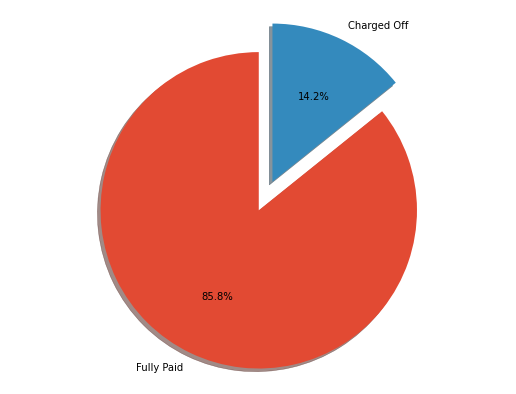

In [1800]:
plt.figure(figsize=[9,7])
plt.pie(loan1.loan_status.value_counts(),labels=loan1.loan_status.unique(),startangle=90,shadow=True,explode=(0.1, 0.1), autopct='%1.1f%%')
plt.axis('equal')
plt.show

### <font color='blue'> Extract the charged off data into different dataframe : loan_c </font>

In [1801]:
loan1.loan_status.unique()
loan_c = loan1[loan.loan_status=='Charged Off']
loan_c.shape
loan1.shape

loan_f = loan1[loan.loan_status=='Fully Paid']
loan_f.shape




(32145, 45)

## <font color='brown'> Univariate Analysis - Numerical values

### <font color='blue'>Loan amount is in range of 5-15K, Outliers in loanamount are >= 30K </font>

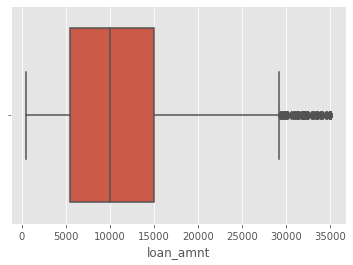

In [1802]:
sns.boxplot(loan1['loan_amnt'],orient='v')
plt.show()

### <font color='blue'>Outliers in int_rate are >=22.5 % </font>

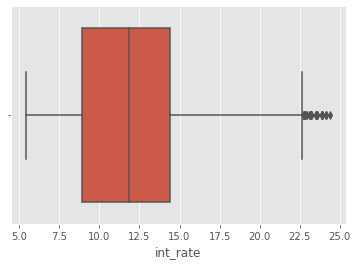

In [1803]:
#loan1['int_rate']
sns.boxplot(loan1['int_rate'])
plt.show()

### <font color='blue'>Outliers in installment are >=800</font>

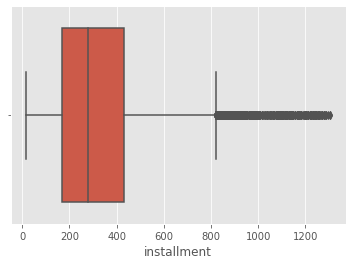

In [1804]:
sns.boxplot(loan1['installment'])
plt.show()


### <font color='blue'>Distribution of dti (Debit to Income ratio) : average is around 10-15</font>

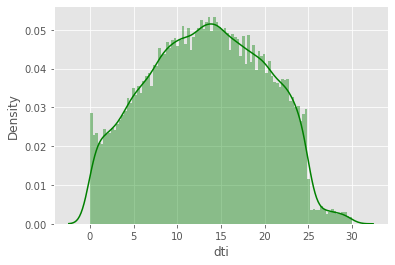

In [1805]:
sns.distplot(loan1.dti, bins=100 , color='g' )
plt.show()


### <font color='blue'>Distribution of earliest_cr_line_year (Earliest credit lines) : Credits have been given since 1970 and have grown since then. The loan distribution had peaked up in the year 2000</font>

<AxesSubplot:xlabel='earliest_cr_line_year', ylabel='Density'>

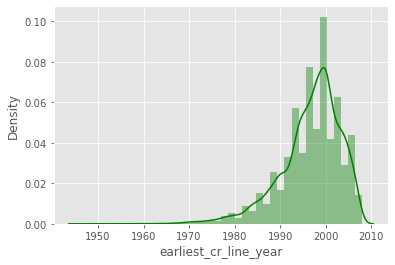

In [1806]:
loan1.earliest_cr_line_year.astype('int32')
sns.distplot(loan1.earliest_cr_line_year, bins=40 , color='g')

<AxesSubplot:xlabel='last_pymnt_d_year', ylabel='Density'>

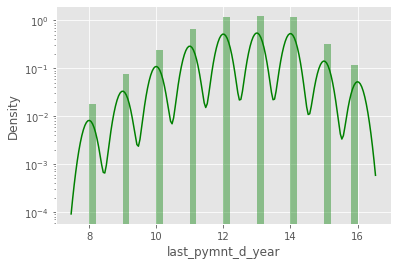

In [1807]:
sns.distplot(loan1.last_pymnt_d_year, bins=40 , color='g',hist_kws={'log':True})

### <font color='blue'>Distribution of inq_last_6mths (The number of inquiries in past 6 months (excluding auto and mortgage inquiries)) <br> Outliers in inq_last_6mths are >2</font>

<AxesSubplot:xlabel='inq_last_6mths'>

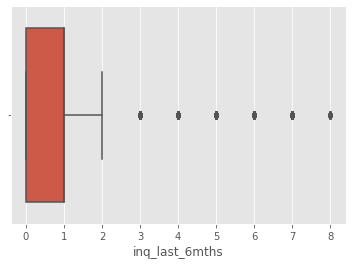

In [1808]:
sns.boxplot(loan1['inq_last_6mths'])



### <font color='blue'>Distribution of mths_since_last_delinq : The number of months since the borrower's last delinquency.</font>

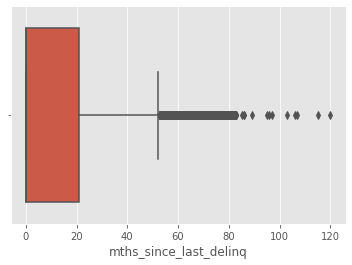

In [1809]:
loan1.mths_since_last_delinq=loan1.mths_since_last_delinq.astype('int32')
sns.boxplot(loan1['mths_since_last_delinq'])

loan_c.mths_since_last_delinq=loan_c.mths_since_last_delinq.astype('int32')
#sns.boxplot(loan_c['mths_since_last_delinq'])


### <font color='blue'>Distribution of pub_rec : Number of derogatory public records</font>


<AxesSubplot:xlabel='pub_rec', ylabel='Density'>

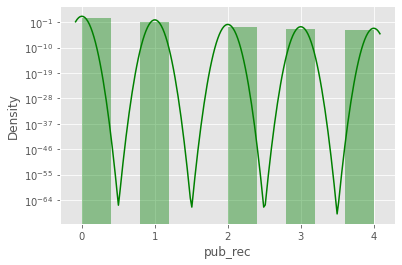

In [1810]:
sns.distplot(loan1.pub_rec, bins=10 , color='g', hist_kws={'log':True})

### <font color='blue'>Distribution of mths_since_last_record : The number of months since the last derogiratory public record.<br> There are accounts with recent public derogiratory records </font>

<AxesSubplot:xlabel='mths_since_last_record', ylabel='Density'>

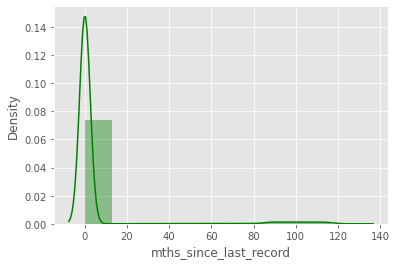

In [1811]:
sns.distplot(loan1.mths_since_last_record, bins=10 , color='g')

### <font color='blue'>Distribution of pub_rec_bankruptcies : Number of public record bankruptcies</font>

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Density'>

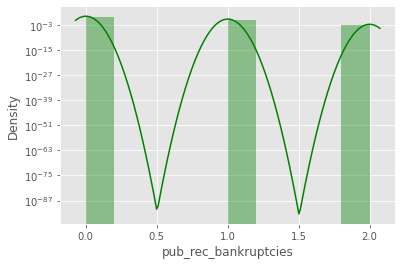

In [1812]:
sns.distplot(loan1.pub_rec_bankruptcies, bins=10 , color='g',hist_kws={'log':True})

### <font color='blue'>Outliers in open_acc : no of open credit lines are >20</font>

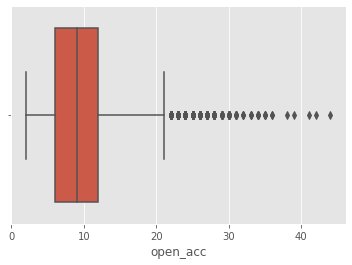

In [1813]:
sns.boxplot(loan1['open_acc'])
plt.show()


### <font color='blue'>Outliers in total_acc : Total number of credit lines are >50</font>

<AxesSubplot:xlabel='total_acc'>

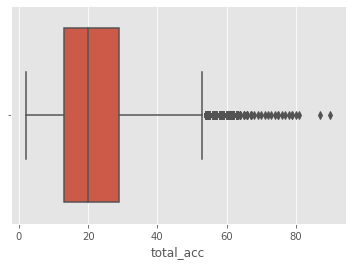

In [1814]:
sns.boxplot(loan1['total_acc'])

## <font color='brown'> Univariate Analysis - Categorical values</font> 

### <font color='blue'>Distribution of annual_inc bin wise (Very low, low, medium, high, very high) </font>

In [1815]:
###### using a custom method to add labels to bar chart 
def addlabels(x,y,xlabel,ylabel):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        plt.xlabel(xlabel, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
        plt.ylabel(ylabel, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})


### <font color='blue'>Distribution of annual_inc bin wise for charged off accounts and all accounts<br>There is no significant difference between the loan status and annual income  </font>

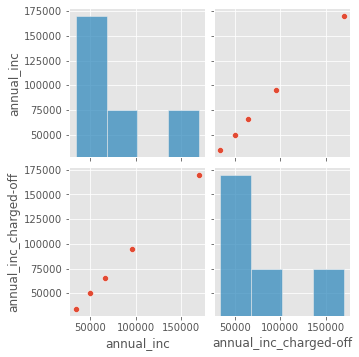

In [1816]:
loan_c_gp = loan_c.groupby(by="annual_inc_bin")["annual_inc"].median()
loan_c_gp = pd.DataFrame(loan_c_gp)
loan_c_gp.reset_index(inplace=True)
loan_c_gp.annual_inc = round(loan_c_gp.annual_inc,2)
#plt.figure(figsize=[9,7])
#plt.bar(loan_c_gp.annual_inc_bin, loan_c_gp.annual_inc)
#addlabels(loan_c_gp.annual_inc_bin, loan_c_gp.annual_inc , 'annual_inc_bin for charged-off accounts' , 'annual_inc for charged-off accounts')

loan1_gp = loan1.groupby(by="annual_inc_bin")["annual_inc"].median()
loan1_gp = pd.DataFrame(loan1_gp)
loan1_gp.reset_index(inplace=True)
loan1_gp.annual_inc = round(loan1_gp.annual_inc,2)

#plt.figure(figsize=[9,7])
#plt.bar(loan1_gp.annual_inc_bin, loan1_gp.annual_inc)
#addlabels(loan1_gp.annual_inc_bin, loan1_gp.annual_inc , 'annual_inc_bin for all accounts' , 'annual_inc for all accounts')


inp1 =loan1_gp
inp1["annual_inc_charged-off"] = loan_c_gp.annual_inc
inp1.head()
sns.pairplot(inp1[["annual_inc_bin","annual_inc","annual_inc_charged-off"]])


### <font color='blue'>Distribution of term for Charged-off accounts </font>
### <font color='red'> Majority of the defaults in charged-off accounts have occurred in 60 months loan term </font>
### <font color='red'> Fully paid accounts have lesser number of 60 months terms</font>

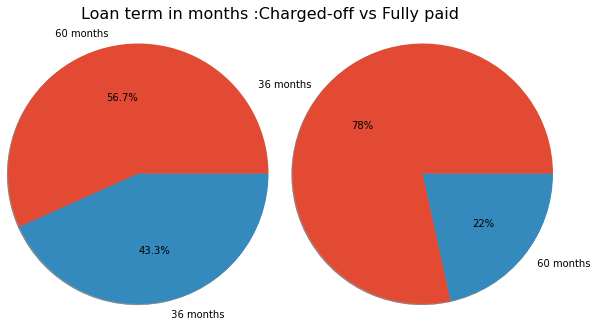

In [1817]:
#plt.figure(figsize=[20,27])

fig, axs = plt.subplots(1, 2)
fig.suptitle("Loan term in months :Charged-off vs Fully paid \n\n\n", fontsize=16)
plt.tight_layout(pad=0.4, w_pad=14.5, h_pad=14.0)
axs[0].pie(loan_c['term'].value_counts(), labels=loan_c.term.unique(), autopct='%1.1f%%', radius=3,shadow=True)
axs[1].pie(loan_f['term'].value_counts(), labels=loan_f.term.unique(),radius=3, autopct='%.0f%%', shadow=True)
plt.gca().set_title
plt.show()


### <font color='blue'>Distribution of grade : </font>
### <font color='red'> Majority of the grades in charged-off accounts is grade B  </font>

<AxesSubplot:>

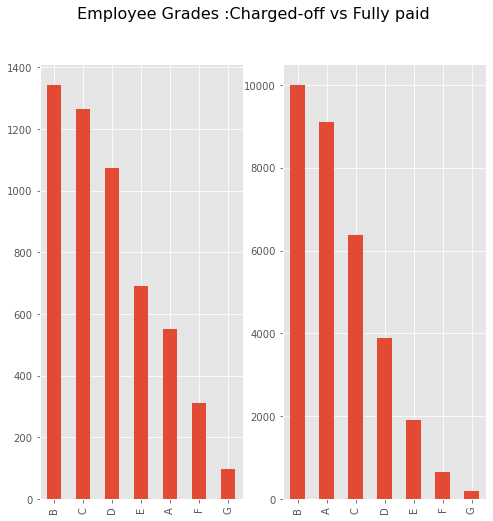

In [1818]:
fig, axes = plt.subplots(figsize=(8,8),nrows=1, ncols=2)
fig.suptitle("Employee Grades :Charged-off vs Fully paid \n\n\n", fontsize=16)
#plt.plot(x,y)
#ax2=plt.subplot(2,2,2)
loan_c['grade'].value_counts().plot.bar(ax=axes[0])
loan_f['grade'].value_counts().plot.bar(ax=axes[1])




<AxesSubplot:>

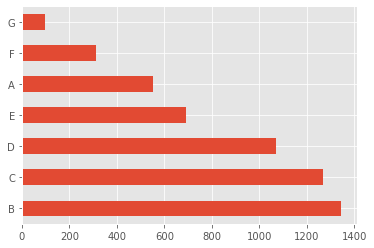

In [1819]:
#sns.boxplot(loan1["grade"] ,loan1["grade"].value_counts())
loan_c['grade'].value_counts().plot.barh()


### <font color='blue'>Distribution of sub_grade :</font>
### <font color='red'>  Majority of charged off accounts are in sub grade B5</font>

<AxesSubplot:>

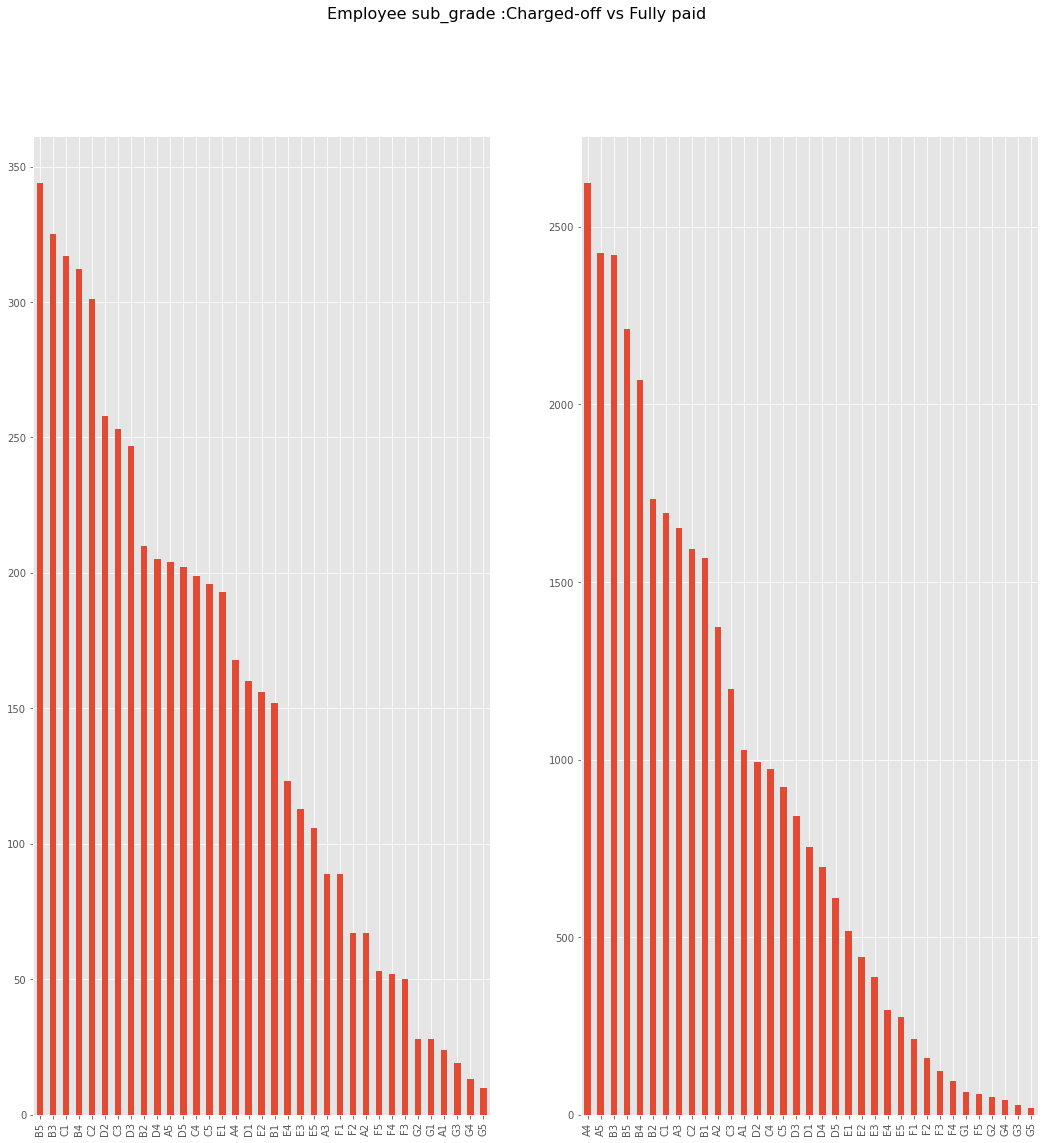

In [1820]:
fig, axes = plt.subplots(figsize=(18,18),nrows=1, ncols=2)
fig.suptitle("Employee sub_grade :Charged-off vs Fully paid \n\n\n", fontsize=16)
#plt.plot(x,y)
#ax2=plt.subplot(2,2,2)
loan_c['sub_grade'].value_counts().plot.bar(ax=axes[0])
loan_f['sub_grade'].value_counts().plot.bar(ax=axes[1])



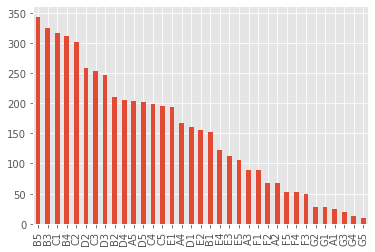

In [1821]:
loan_c['sub_grade'].value_counts().plot.bar()
plt.show()

### <font color='blue'>Distribution of emp_length : </font>
### <font color='red'> Majority defaults are 10+ yrs , 2nd hightest <1 yr  </font>

<AxesSubplot:>

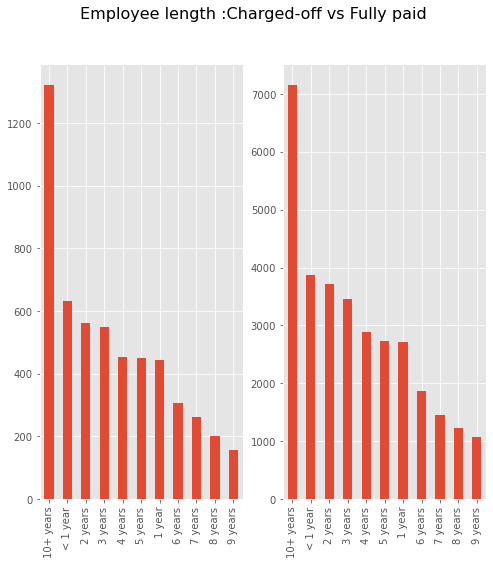

In [1822]:
fig, axes = plt.subplots(figsize=(8,8),nrows=1, ncols=2)
fig.suptitle("Employee length :Charged-off vs Fully paid \n\n\n", fontsize=16)
#plt.plot(x,y)
#ax2=plt.subplot(2,2,2)
loan_c['emp_length'].value_counts().plot.bar(ax=axes[0])
loan_f['emp_length'].value_counts().plot.bar(ax=axes[1])



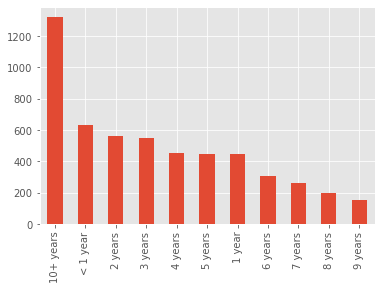

In [1823]:
loan_c.emp_length.unique()
loan_c['emp_length'].value_counts().plot.bar()
plt.show()

### <font color='blue'>Distribution of home_ownership : </font>
### <font color='red'> Majority of charged off accounts have home ownership as Rent </font>

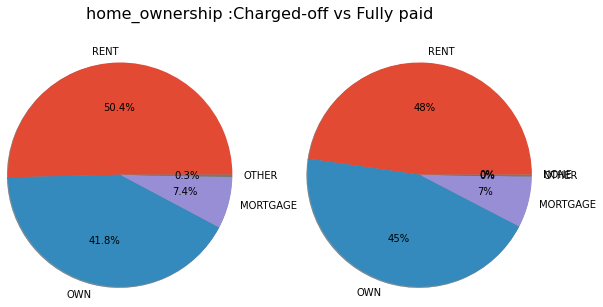

In [1824]:
fig, axs = plt.subplots(1, 2)
fig.suptitle("home_ownership :Charged-off vs Fully paid \n\n\n", fontsize=16)
plt.tight_layout(pad=0.4, w_pad=17.5, h_pad=14.0)
axs[0].pie(loan_c['home_ownership'].value_counts(), labels=loan_c.home_ownership.unique(), autopct='%1.1f%%', radius=3,shadow=True)
axs[1].pie(loan_f['home_ownership'].value_counts(), labels=loan_f.home_ownership.unique(),radius=3, autopct='%.0f%%', shadow=True)
plt.gca().set_title
plt.show()

<AxesSubplot:ylabel='home_ownership'>

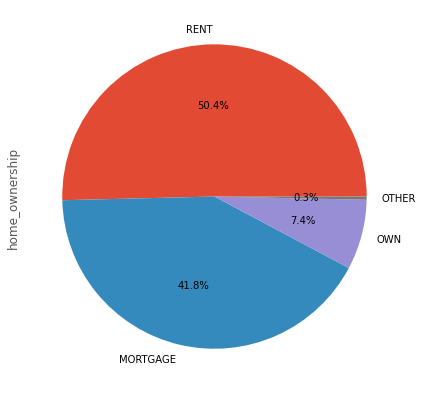

In [1825]:
plt.figure(figsize=[9,7])

loan_c['home_ownership'].value_counts().plot.pie(autopct='%1.1f%%')

### <font color='blue'>Distribution of verification_status :</font>
### <font color='red'>  Majority is not verified , but not much difference than other status </font>

<AxesSubplot:ylabel='verification_status'>

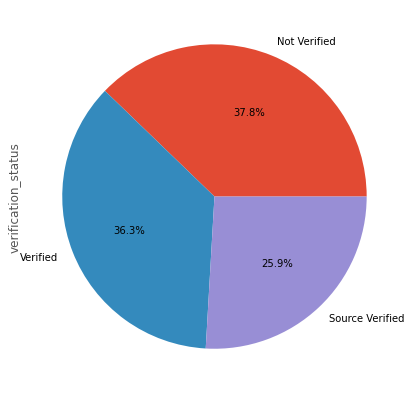

In [1826]:
plt.figure(figsize=[9,7])
loan_c['verification_status'].value_counts().plot.pie(autopct='%1.1f%%')

### <font color='blue'>Distribution of issue_d_year : </font>
### <font color='red'> Majority is 2011</font>

<AxesSubplot:>

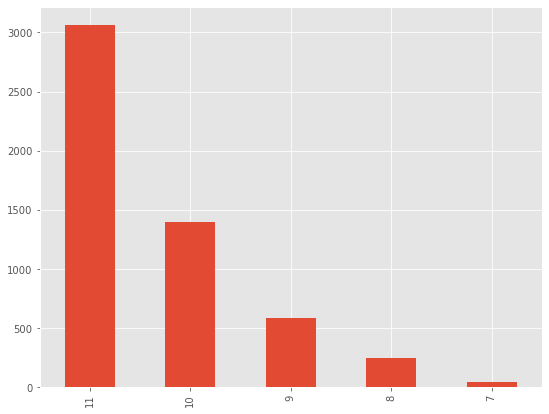

In [1827]:
loan1.issue_d_year.unique()
plt.figure(figsize=[9,7])
loan_c['issue_d_year'].value_counts().plot.bar()

<AxesSubplot:ylabel='issue_d_year'>

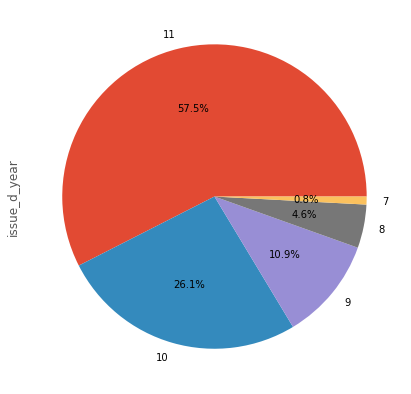

In [1828]:
loan1.issue_d_year.unique()
plt.figure(figsize=[9,7])
loan_c['issue_d_year'].value_counts().plot.pie(labels=loan_c.issue_d_year.unique(),autopct='%1.1f%%')

### <font color='blue'>Distribution of issue_d_month: </font>
### <font color='red'> Majority is Dec</font>

<AxesSubplot:>

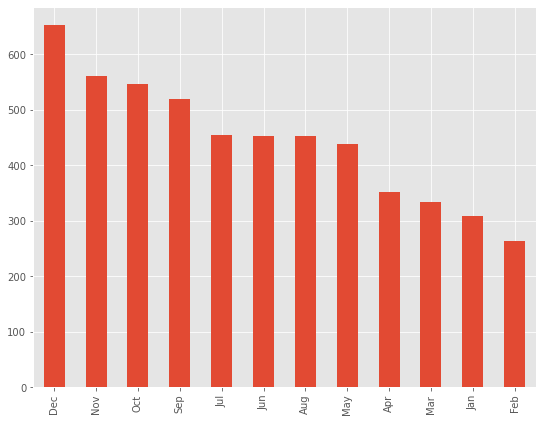

In [1829]:
loan1.issue_d_month.unique()
plt.figure(figsize=[9,7])
loan_c['issue_d_month'].value_counts().plot.bar()

### <font color='blue'>Distribution of purpose :</font>
### <font color='red'>  Majority is Debt consolidation /fmont>

<AxesSubplot:>

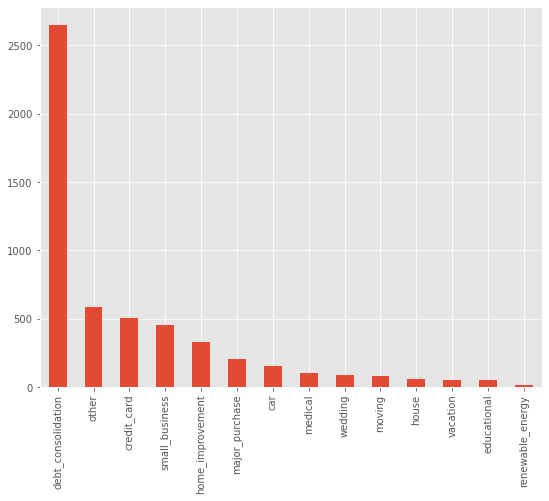

In [1830]:
loan1.purpose.unique()
plt.figure(figsize=[9,7])
loan_c['purpose'].value_counts().plot.bar()

### <font color='blue'>Distribution of addr_state :</font>
### <font color='red'>  Majority is CA </font>

<AxesSubplot:>

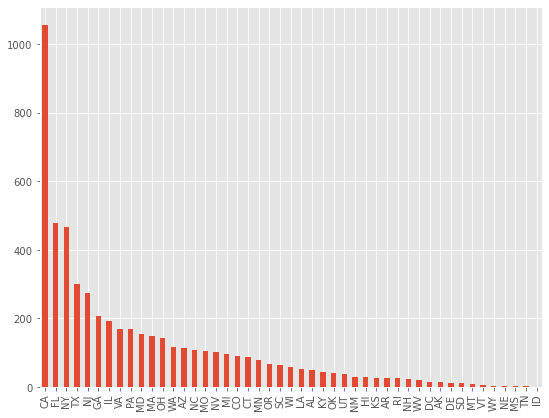

In [1831]:
len(loan_c.addr_state.unique())
plt.figure(figsize=[9,7])
loan_c['addr_state'].value_counts().plot.bar()


## <font color='brown'> Data Analysis : Segmented univariate Analysis (1 category, 1 numeric) (groupby or pivot, using boxplot or bar graph for visualization) </font>


### <font color='purple'> 2.a  loan_status vs Loan amount  :</font>
### <font color='red'>  15.7 % of total amount is charged off. These are the defaults which needs to be analysed to ensure newer sactioned loans will reduce the % of charged off amount</font>


In [1832]:
loan1_gp = loan1.groupby(by="loan_status")["loan_amnt"].sum()
total_count = loan1["loan_amnt"].sum()
loan1_gp = pd.DataFrame(loan1_gp)
loan1_gp.reset_index(inplace=True)
loan1_gp.head()

,loan_status,loan_amnt
0,Charged Off,65532225
1,Fully Paid,351358350


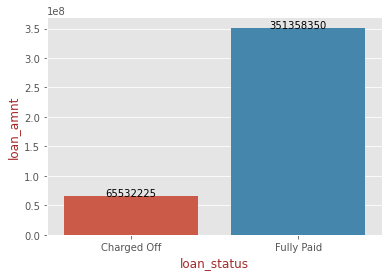

In [1833]:
sns.barplot(data=loan1_gp, x="loan_status" , y="loan_amnt" , estimator=np.median)
addlabels(loan1_gp.loan_status, loan1_gp.loan_amnt,'loan_status' , 'loan_amnt')



   

In [1834]:
round(loan1_gp.loan_amnt[0]/(loan1_gp.loan_amnt[0]+loan1_gp.loan_amnt[1]) *100 , 2)

15.72

### <font color='purple'> 2.a  loan_status vs dti  :  </font>
### <font color='red'> The average (median) of DTI for Charged off loans is 14.32 which is higher compared to Fully paid loans.  </font>

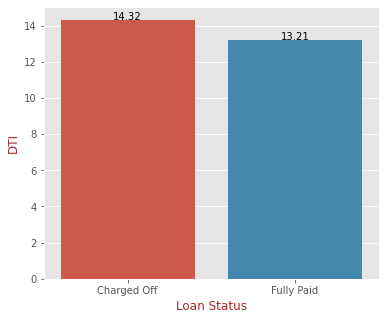

In [1835]:
loan1_gp = loan1.groupby(by="loan_status")["dti"].median()
loan1_gp = pd.DataFrame(loan1_gp)
loan1_gp.reset_index(inplace=True)
plt.figure(figsize=[6,5])
plt.ylabel("DTI", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Loan status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
sns.barplot(data=loan1_gp, x="loan_status" , y="dti" , estimator=np.median)
addlabels(loan1_gp.loan_status, loan1_gp.dti ,'Loan Status' , 'DTI')

###  <font color='purple'> 2.a  loan_status vs inq_last_6mths  : </font>
### <font color='red'> The number of inquiries in past 6 months (excluding auto and mortgage inquiries) . Average number of enquiries done by charged off records is more than fully paid records</font>

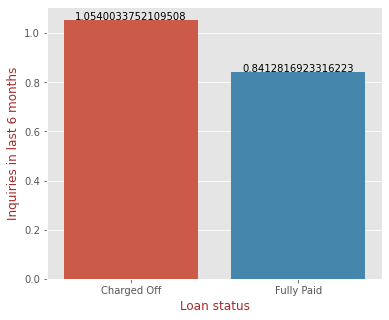

In [1836]:
loan1_gp = loan1.groupby(by="loan_status")["inq_last_6mths"].mean()
loan1_gp = pd.DataFrame(loan1_gp)
loan1_gp.reset_index(inplace=True)
plt.figure(figsize=[6,5])
plt.ylabel("inq_last_6mths", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Loan status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
#plt.bar(loan1_gp.loan_status, loan1_gp.inq_last_6mths)
sns.barplot(data=loan1_gp, x="loan_status" , y="inq_last_6mths" , estimator=np.median)
addlabels(loan1_gp.loan_status, loan1_gp.inq_last_6mths , 'Loan status' , 'Inquiries in last 6 months')

### <font color='purple'> 2.a  loan_status vs open_acc :  </font>
### <font color='red'> Ratio of open_acc to total_acc is more in charged off records compared to Fully paid records (but the difference is not very big, cant be a differntiating factor) </font>

In [1837]:
### ratio of open_account/total_acc
def accRatio(a,b): 
    return a/b

loan1["open_total_acc_ratio"] = loan1.apply(lambda x : accRatio(x.open_acc, x.total_acc),axis=1 )
#loan1.open_total_acc_ratio.head()



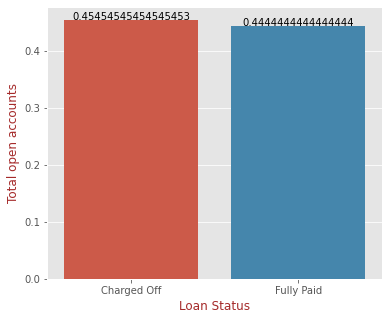

In [1838]:
loan1_gp = loan1.groupby(by="loan_status")["open_total_acc_ratio"].median()
loan1_gp = pd.DataFrame(loan1_gp)
loan1_gp.reset_index(inplace=True)
loan1_gp.head()
plt.figure(figsize=[6,5])
plt.ylabel("open_total_acc_ratio", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Loan status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
#plt.bar(loan1_gp.loan_status, loan1_gp.open_total_acc_ratio)
sns.barplot(data=loan1_gp, x="loan_status" , y="open_total_acc_ratio" , estimator=np.median)
addlabels(loan1_gp.loan_status, loan1_gp.open_total_acc_ratio, 'Loan Status' , 'Total open accounts')



### <font color='purple'> 2.a  loan_status vs pub_rec  : </font>
### <font color='red'> Average number of derogaratory public records are higher in Charged off records compared to fully paid records </font>

In [1839]:
loan1.pub_rec.unique()

array([0, 1, 2, 3, 4], dtype=int64)

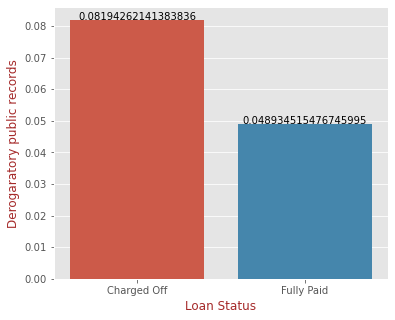

In [1840]:
loan1_gp = loan1.groupby(by="loan_status")["pub_rec"].mean()
loan1_gp = pd.DataFrame(loan1_gp)
loan1_gp.reset_index(inplace=True)
loan1_gp.head()
plt.figure(figsize=[6,5])
plt.ylabel("pub_rec", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Loan status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
#plt.bar(loan1_gp.loan_status, loan1_gp.pub_rec)
sns.barplot(data=loan1_gp, x="loan_status" , y="pub_rec" , estimator=np.median)
addlabels(loan1_gp.loan_status, loan1_gp.pub_rec , 'Loan Status', 'Derogaratory public records')





### <font color='purple'> 2.a  loan_status vs pub_rec_bankruptcies :</font>
### <font color='red'> Avreage number of public record bankruptcies is higher in Charged of records </font>

In [1841]:
loan1.pub_rec_bankruptcies = loan1.pub_rec_bankruptcies.apply(lambda x : float(x))
loan1.pub_rec_bankruptcies.unique()

array([0., 1., 2.])

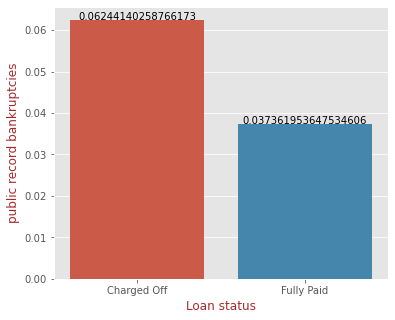

In [1842]:
loan1_gp = loan1.groupby(by="loan_status")["pub_rec_bankruptcies"].mean()
loan1_gp = pd.DataFrame(loan1_gp)
loan1_gp.reset_index(inplace=True)
loan1_gp.head()
plt.figure(figsize=[6,5])
#plt.ylabel("pub_rec_bankruptcies", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
#plt.xlabel("Loan status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
#plt.bar(loan1_gp.loan_status, loan1_gp.pub_rec_bankruptcies)
sns.barplot(data=loan1_gp, x="loan_status" , y="pub_rec_bankruptcies" , estimator=np.median)
addlabels(loan1_gp.loan_status, loan1_gp.pub_rec_bankruptcies , 'Loan status' ,'public record bankruptcies')

### <font color='brown'>For further segment univariate analysis using only the charged Off data , so as to understand the drivers which influence defaulting

### <font color='purple'> 2b. Binned annual Income vs dti</font>
### <font color='red'> On average, Low annual income group have more dti , followed by Very low and low annual income group </font>

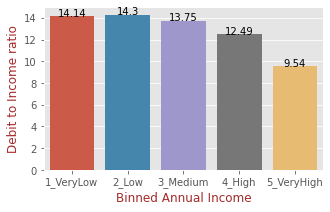

In [1843]:
loan_c_gp = loan1.groupby(by="annual_inc_bin")["dti"].median()
loan_c_gp = pd.DataFrame(loan_c_gp)
loan_c_gp.reset_index(inplace=True)
loan_c_gp.dti = round(loan_c_gp.dti,2)
plt.figure(figsize=[5,3])
#plt.bar(loan_c_gp.annual_inc_bin, loan_c_gp.dti)
sns.barplot(data=loan_c_gp, x="annual_inc_bin" , y="dti" , estimator=np.median)
addlabels(loan_c_gp.annual_inc_bin, loan_c_gp.dti , 'Binned Annual Income' , 'Debit to Income ratio')

### <font color='purple'> 2.b Binned Annual Income bin vs loan amount :</font>
### <font color='red'> Higher the income, bigger is the loan </font>

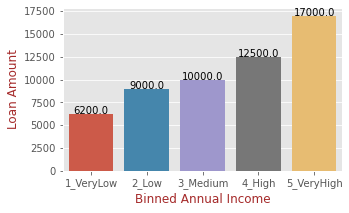

In [1844]:
loan_c_gp = loan1.groupby(by="annual_inc_bin")["loan_amnt"].median()
loan_c_gp = pd.DataFrame(loan_c_gp)
loan_c_gp.reset_index(inplace=True)
loan_c_gp.loan_amnt = round(loan_c_gp.loan_amnt,2)
plt.figure(figsize=[5,3])
plt.bar(loan_c_gp.annual_inc_bin, loan_c_gp.loan_amnt)
#addlabels(loan_c_gp.annual_inc_bin, loan_c_gp.loan_amnt)
#sns.boxplot(loan_c_gp.annual_inc_bin , loan_c_gp.loan_amnt)
sns.barplot(data=loan_c_gp, x="annual_inc_bin" , y="loan_amnt" , estimator=np.median)
addlabels(loan_c_gp.annual_inc_bin, loan_c_gp.loan_amnt , 'Binned Annual Income' , 'Loan Amount')




### <font color='purple'> 2.b Binned Annual Income bin vs loan inq_last_6mths :</font>
### <font color='red'> positive Linear correlation - Higher the income has more number of enquiries </font>

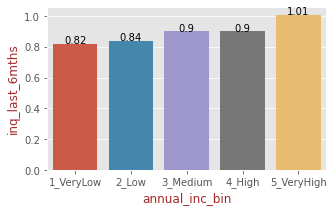

In [1845]:
loan_c_gp = loan1.groupby(by="annual_inc_bin")["inq_last_6mths"].mean()
loan_c_gp = pd.DataFrame(loan_c_gp)
loan_c_gp.reset_index(inplace=True)
loan_c_gp.inq_last_6mths = round(loan_c_gp.inq_last_6mths,2)
plt.figure(figsize=[5,3])
#plt.bar(loan_c_gp.annual_inc_bin, loan_c_gp.inq_last_6mths)
sns.barplot(data=loan_c_gp, x="annual_inc_bin" , y="inq_last_6mths" , estimator=np.median)
addlabels(loan_c_gp.annual_inc_bin, loan_c_gp.inq_last_6mths ,'annual_inc_bin' , 'inq_last_6mths' )

### <font color='purple'> 2.b Binned Annual Income bin vs open_acc </font>
### <font color='red'> positive Linear correlation - Higher the income has more number of open accounts </font>

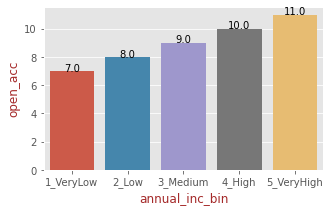

In [1846]:
loan_c_gp = loan1.groupby(by="annual_inc_bin")["open_acc"].median()
loan_c_gp = pd.DataFrame(loan_c_gp)
loan_c_gp.reset_index(inplace=True)
loan_c_gp.open_acc = round(loan_c_gp.open_acc,2)
plt.figure(figsize=[5,3])
#plt.bar(loan_c_gp.annual_inc_bin, loan_c_gp.open_acc)
sns.barplot(data=loan_c_gp, x="annual_inc_bin" , y="open_acc" , estimator=np.median)
addlabels(loan_c_gp.annual_inc_bin, loan_c_gp.open_acc, 'annual_inc_bin' , 'open_acc')

### <font color='purple'>2.b Binned Annual Income bin vs pub_rec </font>
###  <font color='red'> Low and medium annual income group has many public records </font>

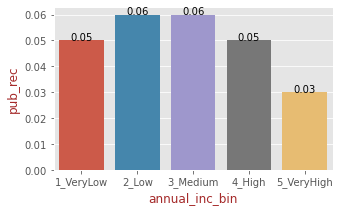

In [1847]:
loan_c_gp = loan1.groupby(by="annual_inc_bin")["pub_rec"].mean()
loan_c_gp = pd.DataFrame(loan_c_gp)
loan_c_gp.reset_index(inplace=True)
loan_c_gp.pub_rec = round(loan_c_gp.pub_rec,2)
plt.figure(figsize=[5,3])
#plt.bar(loan_c_gp.annual_inc_bin, loan_c_gp.pub_rec)
sns.barplot(data=loan_c_gp, x="annual_inc_bin" , y="pub_rec" , estimator=np.median)
addlabels(loan_c_gp.annual_inc_bin, loan_c_gp.pub_rec,'annual_inc_bin' ,'pub_rec' )

### <font color='purple'> 2.b Binned Annual Income bin vs pub_rec_bankruptcies  </font>
###  <font color='red'> Low and medium annual income group has many number of public record bankruptcies </font>     

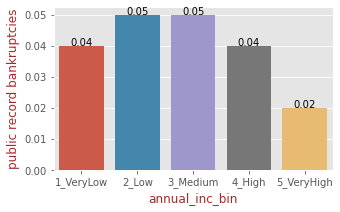

In [1848]:
loan_c_gp = loan1.groupby(by="annual_inc_bin")["pub_rec_bankruptcies"].mean()
loan_c_gp = pd.DataFrame(loan_c_gp)
loan_c_gp.reset_index(inplace=True)
loan_c_gp.pub_rec_bankruptcies = round(loan_c_gp.pub_rec_bankruptcies,2)
plt.figure(figsize=[5,3])
#plt.bar(loan_c_gp.annual_inc_bin, loan_c_gp.pub_rec_bankruptcies)
sns.barplot(data=loan_c_gp, x="annual_inc_bin" , y="pub_rec_bankruptcies" , estimator=np.median)
addlabels(loan_c_gp.annual_inc_bin, loan_c_gp.pub_rec_bankruptcies,'annual_inc_bin' , 'public record bankruptcies')

### <font color='purple'> 2.b Grade vs number of months since the borrower's last delinquency(default) </font>
### <font color='red'>  Grade A shows more fequent delinquency(error) <BR> and in Grade A, more delinqency is in lower sub-grades </font>


<AxesSubplot:xlabel='grade', ylabel='mths_since_last_delinq'>

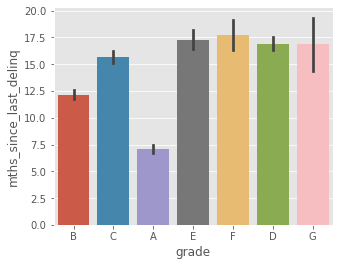

In [1849]:
plt.figure(figsize=[5,4])
sns.barplot(loan1.grade , loan1.mths_since_last_delinq )

<AxesSubplot:xlabel='sub_grade', ylabel='mths_since_last_delinq'>

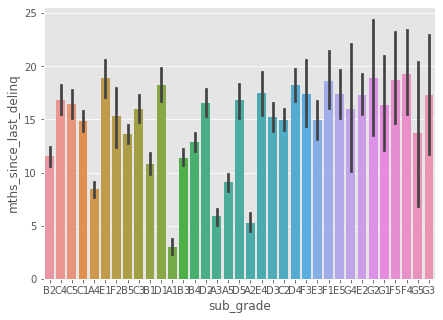

In [1850]:
plt.figure(figsize=[7,5])
sns.barplot(loan1.sub_grade , loan1.mths_since_last_delinq )

### <font color='purple'> 2.b Grade vs total_acc</font>
### <font color='red'>  A has more overall (open + closed) credits </font>

<AxesSubplot:xlabel='sub_grade', ylabel='total_acc'>

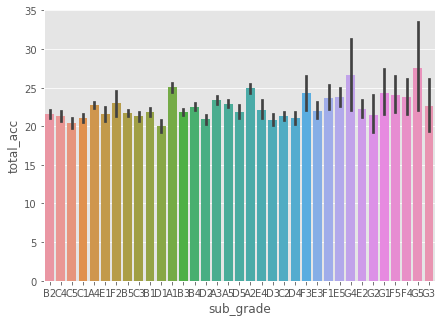

In [1851]:
plt.figure(figsize=[7,5])
sns.barplot(loan1.sub_grade , loan1.total_acc )

### <font color='purple'> 2.b Grade vs total_rec_late_fee</font>
### <font color='red'> By looking at the ratio of late fees received vs total fees recieved , Group A has more number of late fees paid </font>

<AxesSubplot:xlabel='grade', ylabel='total_rec_late_ratio'>

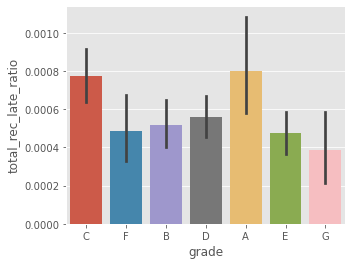

In [1852]:
plt.figure(figsize=[5,4])
loan_c["total_rec_late_ratio"] = loan_c.apply(lambda x : x.total_rec_late_fee / x.loan_amnt,axis=1)
sns.barplot(loan_c.grade , loan_c.total_rec_late_ratio )

### <font color='purple'> 2.c home_ownership vs loan_amnt :</font>
### <font color='red'>Mortgage home take more loan  ( Home loans)

<AxesSubplot:xlabel='home_ownership', ylabel='loan_amnt'>

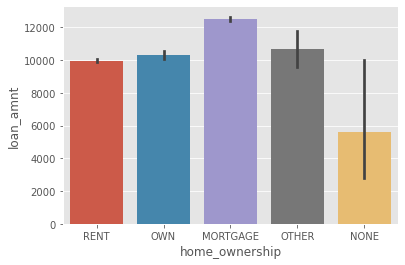

In [1853]:
sns.barplot(loan1.home_ownership , loan1.loan_amnt )

### <font color='purple'> 2.c home_ownership vs DTI :</font>
### <font color='red'>Mortgage have higher DTI , but difference is not very big,so ignoring this data

<AxesSubplot:xlabel='home_ownership', ylabel='dti'>

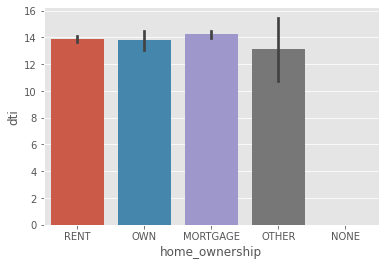

In [1854]:
#plt.figure(figsize=[12,10])
sns.barplot(loan1.home_ownership , loan_c.dti )

### <font color='purple'> 2.c home_ownership vs mths_since_last_delinq</font>
### <font color='red'> Mortgage has lower mths_since_last_delinq , ie, more frequent defaults have occurred in Mortgage and rent

<AxesSubplot:xlabel='home_ownership', ylabel='mths_since_last_delinq'>

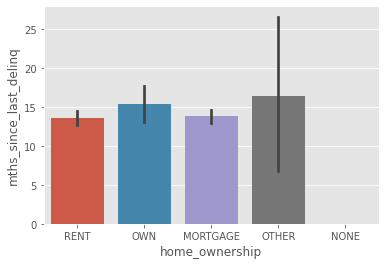

In [1855]:

#plt.figure(figsize=[12,10])
sns.barplot(loan1.home_ownership , loan_c.mths_since_last_delinq )

### <font color='purple'> 2.c verification_status vs loan_amnt :</font>

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

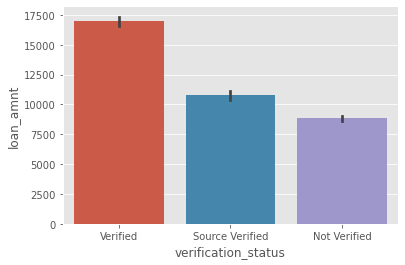

In [1856]:
sns.barplot(loan1.verification_status , loan_c.loan_amnt )

### <font color='purple'> 2.c verification_status vs dti :</font>
### <font color='red'>"verified" records have highter dti

<AxesSubplot:xlabel='verification_status', ylabel='dti'>

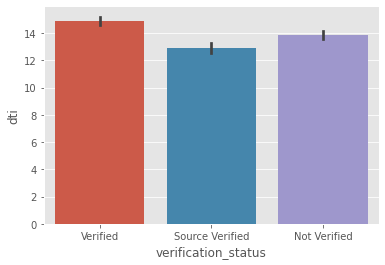

In [1857]:
sns.barplot(loan1.verification_status , loan_c.dti )

### <font color='purple'> 2.c verification_status vs mths_since_last_delinq :</font>

<AxesSubplot:xlabel='verification_status', ylabel='pub_rec'>

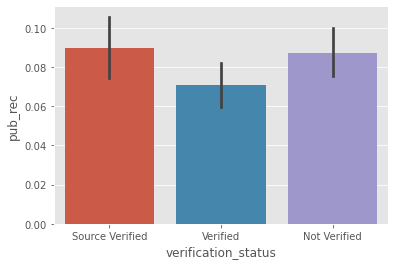

In [1858]:
sns.barplot(loan_c.verification_status , loan_c.pub_rec )

### <font color='purple'> 2.c verification_status vs pub_rec :</font>

<AxesSubplot:xlabel='verification_status', ylabel='pub_rec_bankruptcies'>

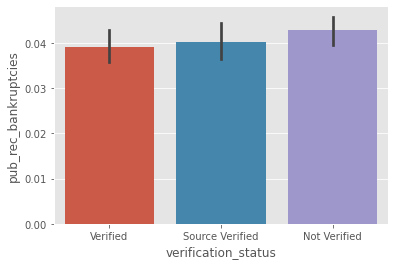

In [1859]:
sns.barplot(loan1.verification_status , loan1.pub_rec_bankruptcies )

### <font color='purple'> 2.c verification_status vs emp_length_1

<AxesSubplot:xlabel='verification_status', ylabel='emp_length_1'>

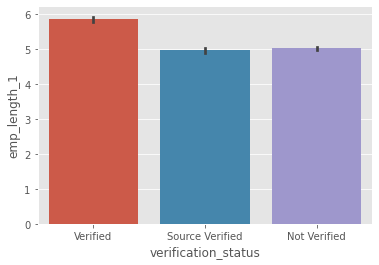

In [1860]:
#plt.figure(figsize=[12,10])
sns.barplot(loan1.verification_status , loan1.emp_length_1  )

### <font color='purple'> 2.c Purpose vs emp_length_1

<AxesSubplot:xlabel='purpose', ylabel='emp_length_1'>

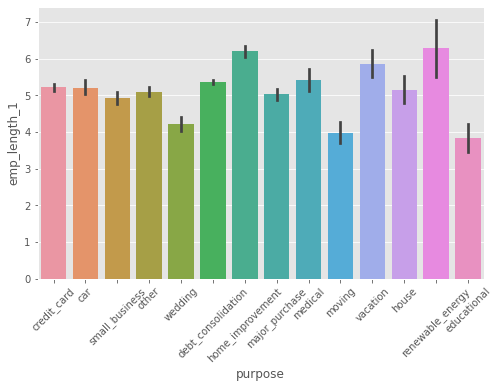

In [1861]:
plt.figure(figsize=[8,5])
plt.xticks(rotation=45)
sns.barplot(loan1.purpose, loan1.emp_length_1  )

### <font color='purple'> 2.c Purpose vs loan amount</font>
### <font color='red'>"small business have higher reason for loan taking

<AxesSubplot:xlabel='purpose', ylabel='loan_amnt'>

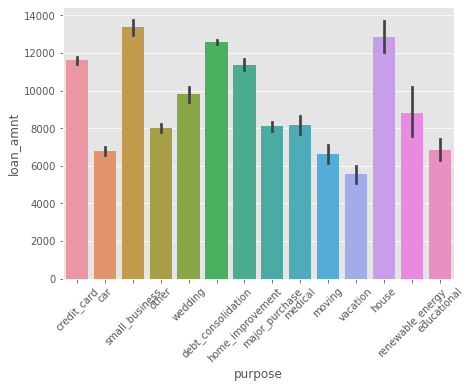

In [1862]:
plt.figure(figsize=[7,5])
plt.xticks(rotation=45)
sns.barplot(loan1.purpose, loan1.loan_amnt   )

### <font color='purple'> 2.c Purpose vs Annual income</font>
### <font color='red'>"Lower income groups take loan for small business , car, moving and education

<AxesSubplot:xlabel='purpose', ylabel='annual_inc'>

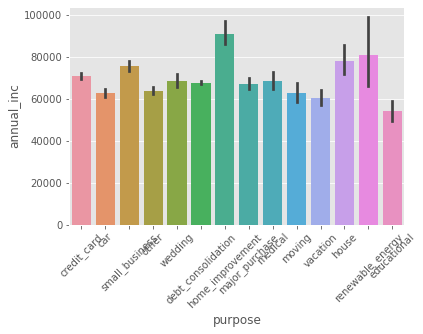

In [1863]:
plt.xticks(rotation=45)
sns.barplot(loan1.purpose, loan1.annual_inc )

### <font color='purple'> 2.c Purpose vs DTI</font>
### <font color='red'>"Credit card and marriage purposes have higher DTI

<AxesSubplot:xlabel='purpose', ylabel='dti'>

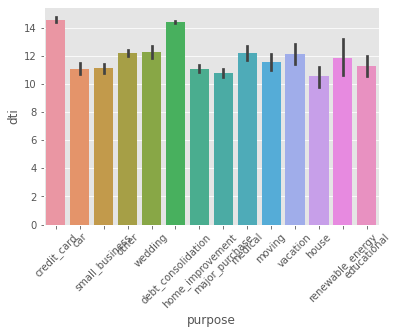

In [1864]:
plt.xticks(rotation=45)
sns.barplot(loan1.purpose, loan1.dti  )

<AxesSubplot:xlabel='purpose', ylabel='mths_since_last_delinq'>

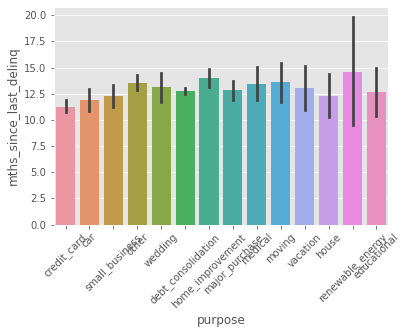

In [1865]:
plt.xticks(rotation=45)
sns.barplot(loan1.purpose, loan1.mths_since_last_delinq  )

<AxesSubplot:xlabel='purpose', ylabel='open_acc'>

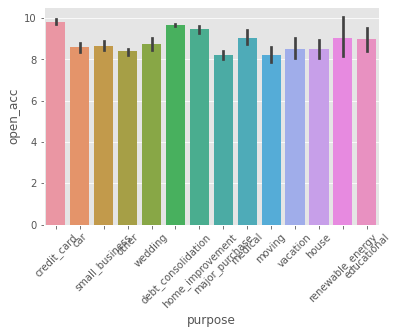

In [1866]:
plt.xticks(rotation=45)
sns.barplot(loan1.purpose, loan1.open_acc  )

<AxesSubplot:xlabel='purpose', ylabel='pub_rec'>

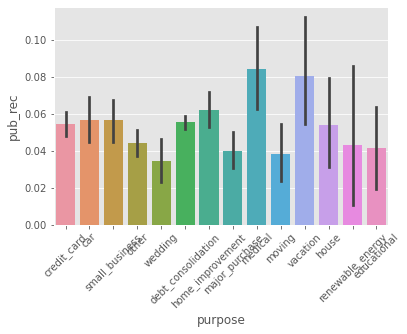

In [1867]:

plt.xticks(rotation=45)
sns.barplot(loan1.purpose, loan1.pub_rec  )

<AxesSubplot:xlabel='purpose', ylabel='total_acc'>

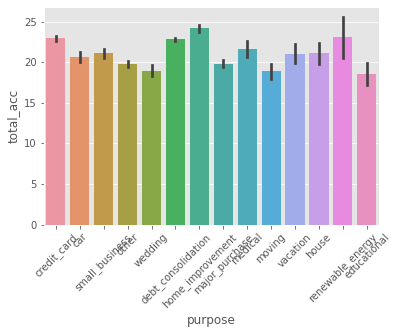

In [1868]:
plt.xticks(rotation=45)
sns.barplot(loan1.purpose, loan1.total_acc  )

<AxesSubplot:xlabel='purpose', ylabel='total_pymnt'>

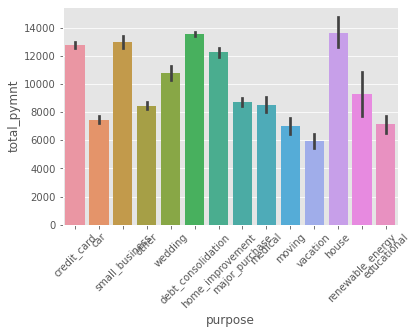

In [1869]:

plt.xticks(rotation=45)
sns.barplot(loan1.purpose, loan1.total_pymnt  )

<AxesSubplot:xlabel='purpose', ylabel='total_rec_late_fee'>

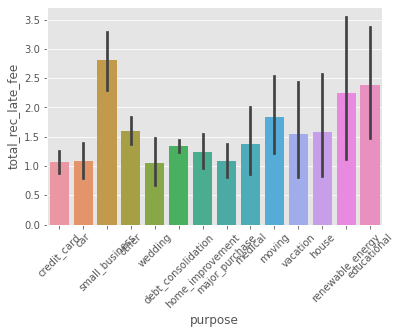

In [1870]:
plt.xticks(rotation=45)
sns.barplot(loan1.purpose, loan1.total_rec_late_fee  )

<AxesSubplot:xlabel='purpose', ylabel='recoveries'>

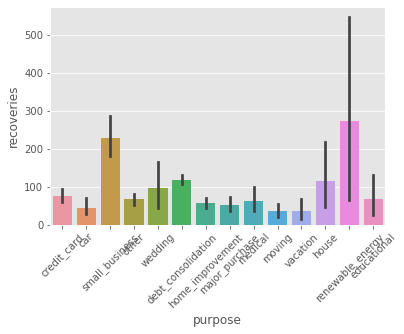

In [1871]:
plt.xticks(rotation=45)
sns.barplot(loan1.purpose, loan1.recoveries  )

<AxesSubplot:xlabel='purpose', ylabel='collection_recovery_fee'>

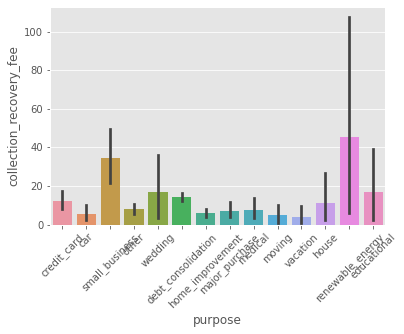

In [1872]:
plt.xticks(rotation=45)
sns.barplot(loan1.purpose, loan1.collection_recovery_fee  )

<AxesSubplot:xlabel='purpose', ylabel='pub_rec_bankruptcies'>

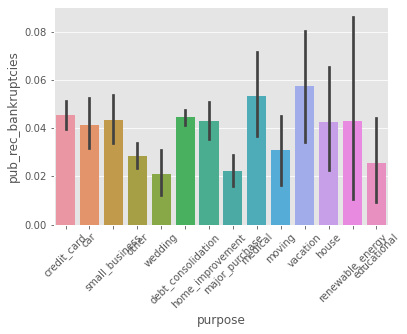

In [1873]:
plt.xticks(rotation=45)
sns.barplot(loan1.purpose, loan1.pub_rec_bankruptcies  )

<AxesSubplot:xlabel='purpose', ylabel='emp_length_1'>

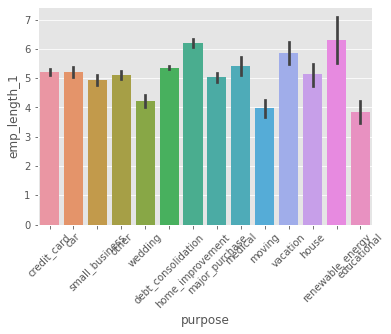

In [1874]:
plt.xticks(rotation=45)
sns.barplot(loan1.purpose, loan1.emp_length_1  )

# <font color='green'>Multivariate Analysis</font>

In [1875]:

def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

In [1876]:
selected_columns =["loan_amnt","int_rate","installment","annual_inc","dti","earliest_cr_line","mths_since_last_delinq","open_acc","pub_rec","total_acc","total_pymnt","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","pub_rec_bankruptcies","zip_code"]
loan3 = select_columns(loan1, selected_columns)
loan3.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,mths_since_last_delinq,open_acc,pub_rec,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies,zip_code
count,37478.000000,37478.000000,37478.000000,3.747800e+04,37478.000000,37478.00000,37478.000000,37478.000000,37478.000000,37478.000000,37478.00000,37478.000000,37478.000000,37478.000000,37478.000000,37478.000000,37478.000000
mean,11123.607850,11.959460,324.751939,6.944405e+04,13.286508,12.72728,9.301964,0.053631,22.094535,11976.918546,9737.24212,2140.782067,1.381408,97.513038,12.700467,0.040931,502.074390
std,7352.559241,3.682557,208.848185,6.471923e+04,6.659785,21.59362,4.396423,0.234462,11.415892,8818.643856,7014.77513,2395.773419,7.366532,701.031785,151.630750,0.198805,330.050266
min,500.000000,5.420000,15.690000,4.000000e+03,0.000000,0.00000,2.000000,0.000000,2.000000,33.730000,0.00000,6.220000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,5500.000000,8.940000,167.470000,4.100000e+04,8.160000,0.00000,6.000000,0.000000,13.000000,5577.788941,4600.00000,658.350000,0.000000,0.000000,0.000000,0.000000,200.000000
50%,10000.000000,11.830000,280.175000,6.000000e+04,13.390000,0.00000,9.000000,0.000000,20.000000,9804.509323,8000.00000,1325.135000,0.000000,0.000000,0.000000,0.000000,448.000000
75%,15000.000000,14.420000,429.180000,8.300000e+04,18.550000,21.00000,12.000000,0.000000,29.000000,16260.535077,13350.00000,2703.522500,0.000000,0.000000,0.000000,0.000000,852.000000
max,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,120.00000,44.000000,4.000000,90.000000,58563.679930,35000.02000,23563.680000,180.200000,29623.350000,7002.190000,2.000000,999.000000


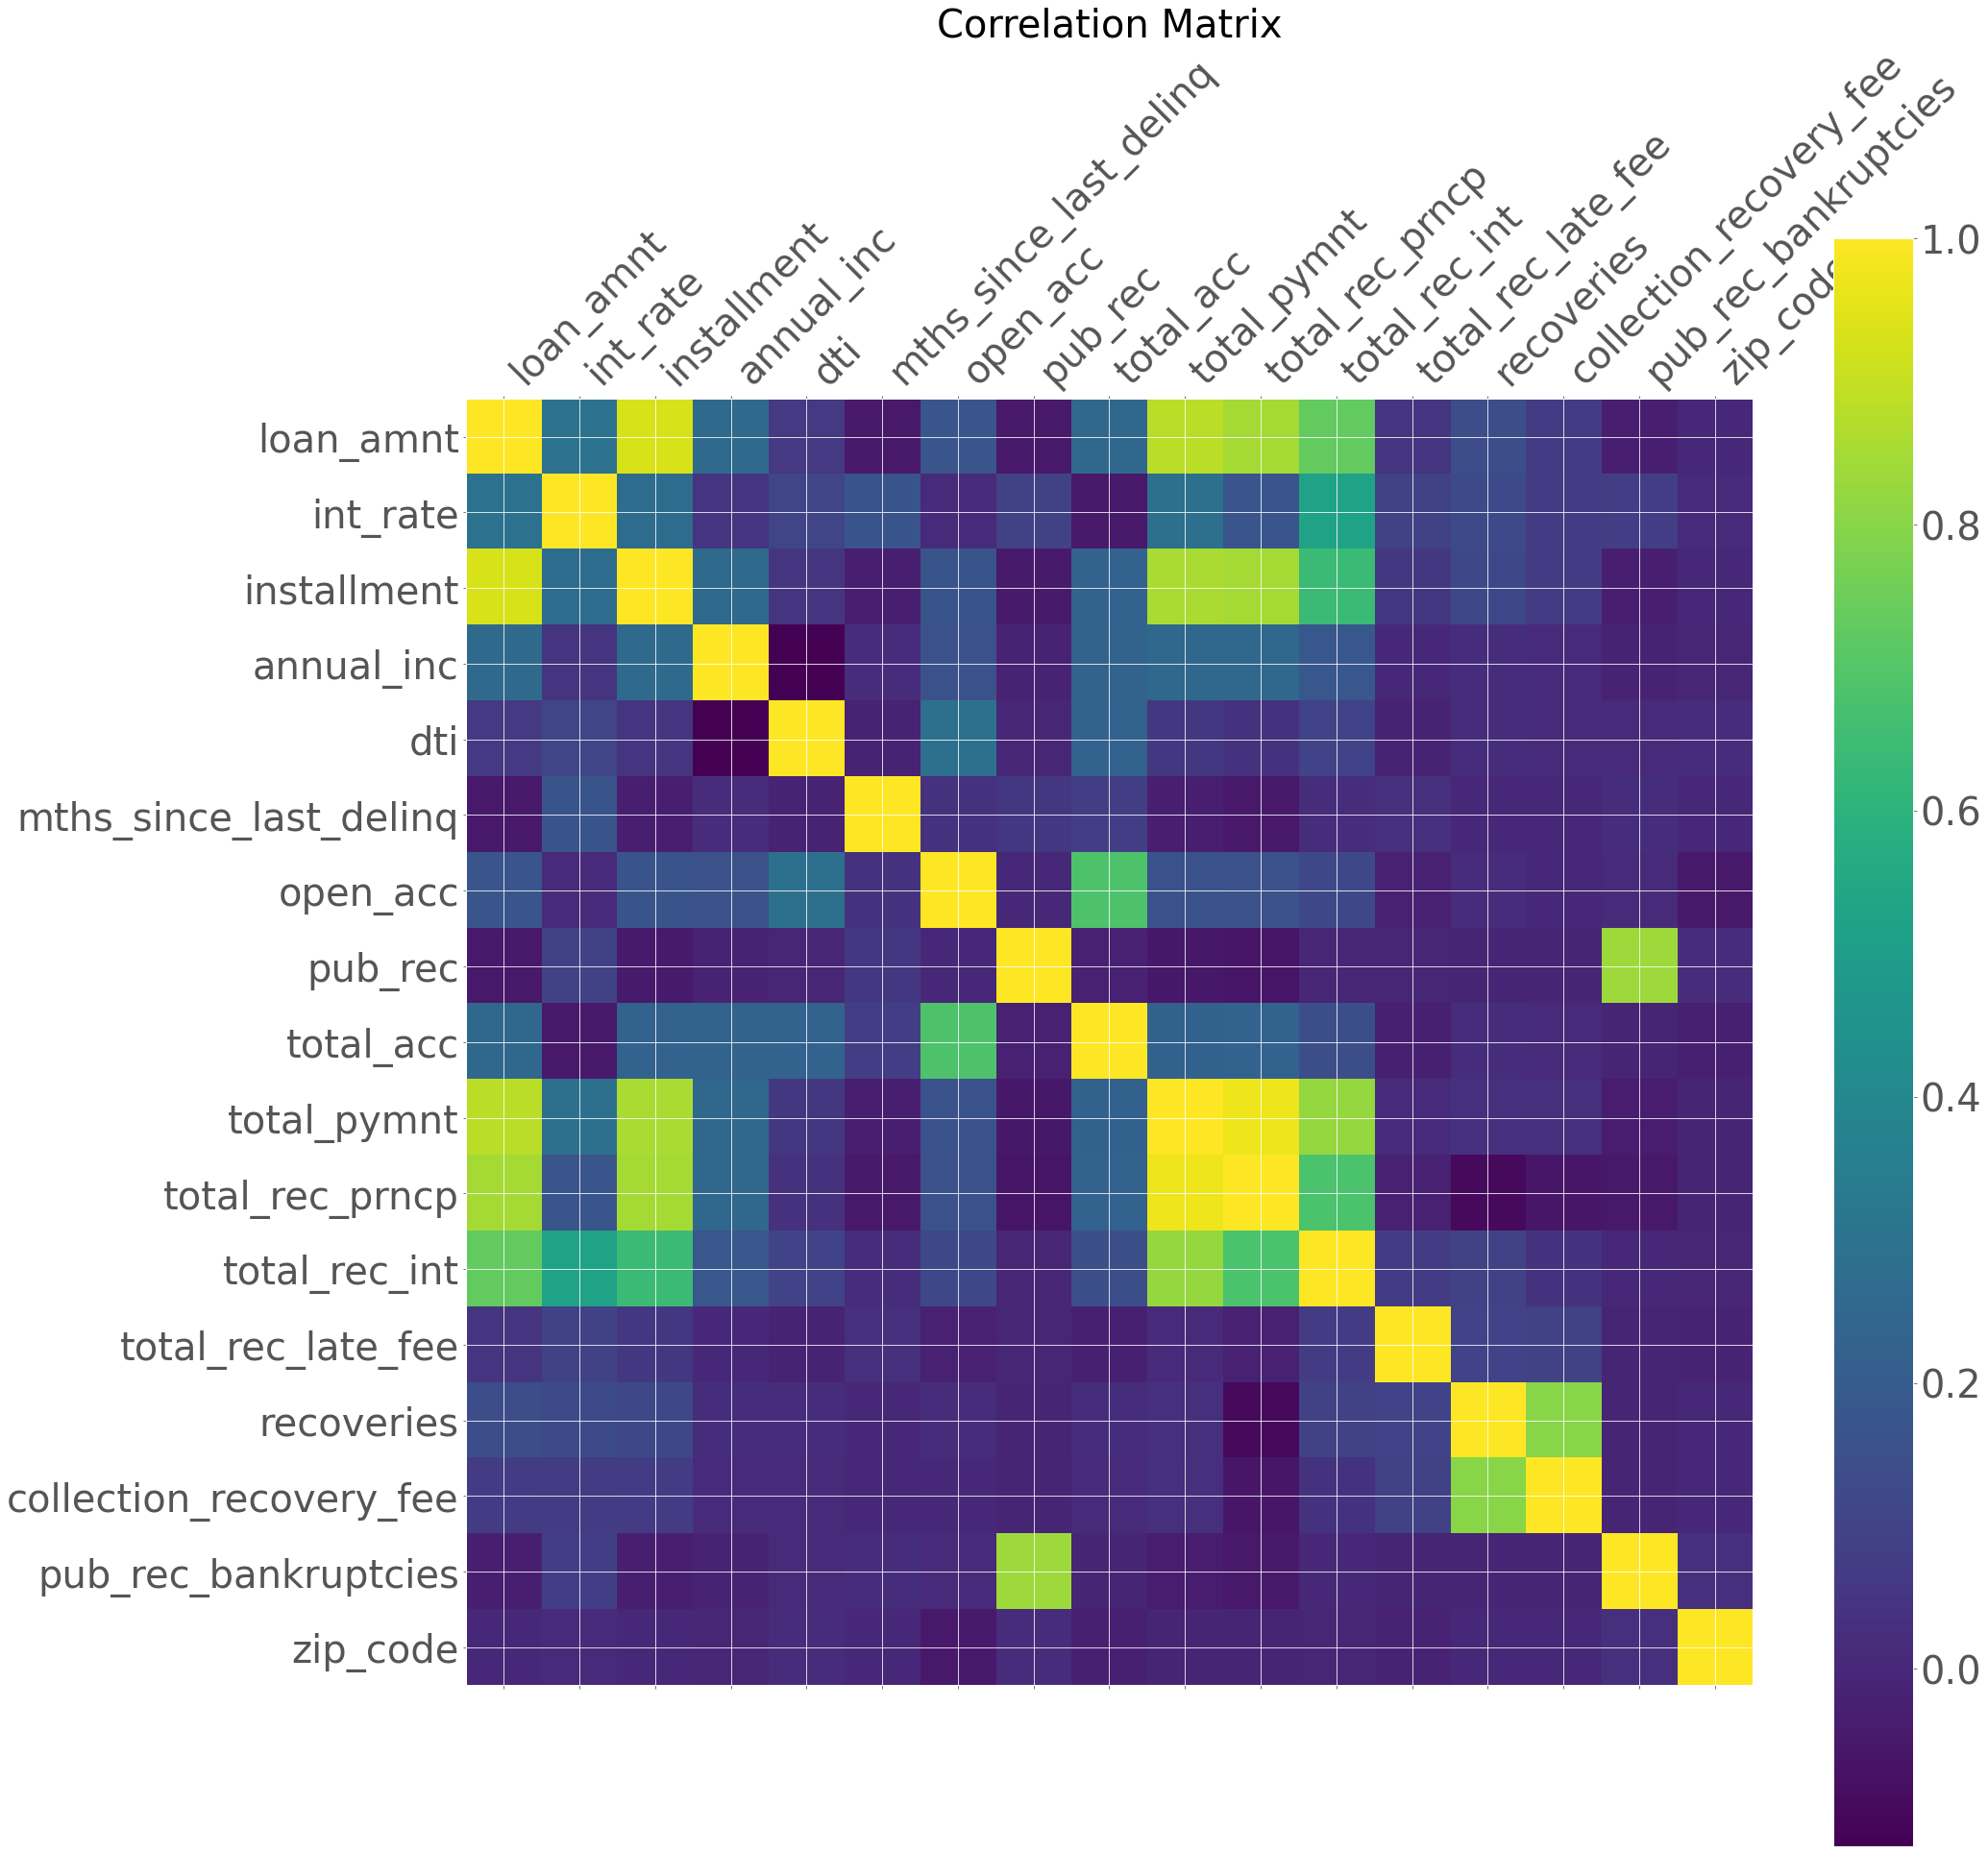

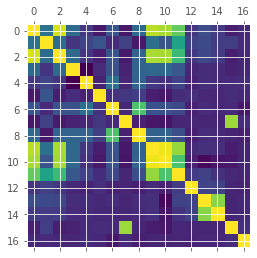

In [1877]:
#sns.pairplot(loan3[["loan_amnt","int_rate","installment","annual_inc","dti","earliest_cr_line","mths_since_last_delinq","open_acc","pub_rec","total_acc","total_pymnt","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","pub_rec_bankruptcies","zip_code","emp_length_1"]])

f = plt.figure(figsize=(30, 30))
plt.matshow(loan3.corr(), fignum=f.number)
plt.xticks(range(loan3.select_dtypes(['number']).shape[1]), loan3.select_dtypes(['number']).columns, fontsize=40, rotation=45,ha="left")
plt.yticks(range(loan3.select_dtypes(['number']).shape[1]), loan3.select_dtypes(['number']).columns, fontsize=40)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=40)
plt.title('Correlation Matrix', fontsize=40);
plt.matshow(loan3.corr())


<Figure size 864x720 with 0 Axes>

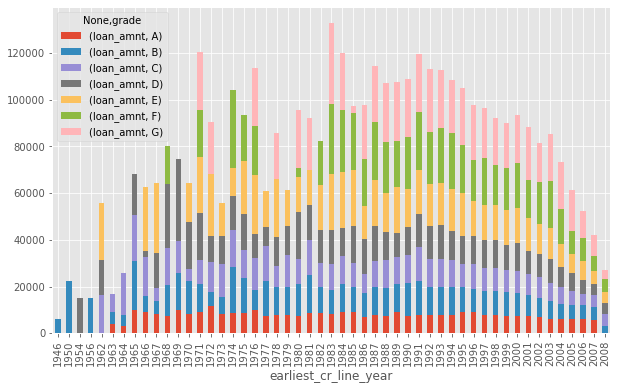

In [1878]:
loan1.earliest_cr_line_year = loan1.earliest_cr_line_year.astype('int32')

plt.figure(figsize=[12,10])
loan2 = loan1.sort_values("earliest_cr_line_year")
#sns.barplot(loan2.grade , loan2.earliest_cr_line_year)

pivot1 = loan1.pivot_table(index = "earliest_cr_line_year", columns = ["grade"], values =["loan_amnt"], aggfunc='median')
#pivot1.head()
#data1 = pivot1[["Adults only 18+" , "Mature 17+" , "Teen"]].apply(lambda x : x/x.sum() , axis=1)
pivot1.plot(kind="bar",stacked="True", figsize=[10,6])
plt.show()




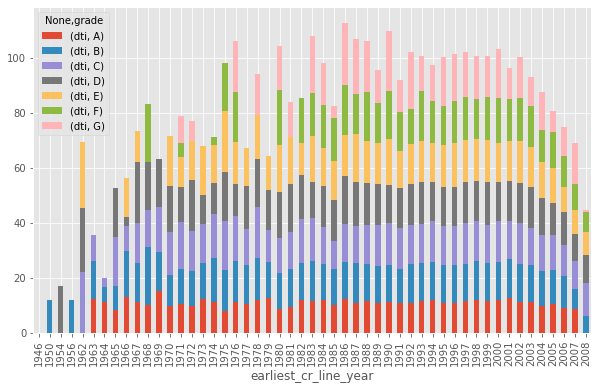

In [1879]:

pivot1 = loan1.pivot_table(index = "earliest_cr_line_year", columns = ["grade"], values =["dti"], aggfunc='median')
#pivot1.head()
#data1 = pivot1[["Adults only 18+" , "Mature 17+" , "Teen"]].apply(lambda x : x/x.sum() , axis=1)
pivot1.plot(kind="bar",stacked="True", figsize=[10,6])
plt.show()


<AxesSubplot:xlabel='earliest_cr_line_year', ylabel='loan_amnt'>

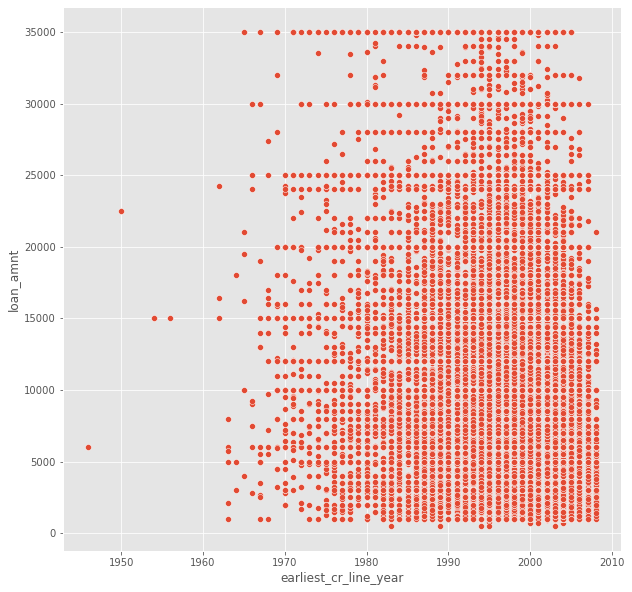

In [1880]:
plt.figure(figsize = (10,10))
sns.scatterplot( loan2.earliest_cr_line_year,loan2.loan_amnt)